<a href="https://colab.research.google.com/github/Shalinivijayravikumar/Excel-Projects/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This dataset contains synthetic data simulating customer behavior for a Netflix-like video streaming service. It includes 5,000 records with 14 carefully engineered features designed for churn prediction modeling, business insights, and customer segmentation.

The dataset is ideal for:

Machine learning classification tasks (churn vs. non-churn)

Exploratory data analysis (EDA)

Customer behavior modeling in OTT platforms

# 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).¶

### Import libraries and load data

In [785]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [786]:
os.getcwd()

'/content'

In [787]:
print("Current directory:", os.getcwd())

Current directory: /content


In [788]:
os.chdir('/content')

In [789]:
os.getcwd()

'/content'

In [790]:
from google.colab import files
uploaded = files.upload()

Saving netflix_customer_churn.csv to netflix_customer_churn (6).csv


In [791]:
import pandas as pd
df = pd.read_csv("netflix_customer_churn.csv")

### LOAD THE DATA

In [792]:
df=pd.read_csv("netflix_customer_churn.csv")

### Checking the data

In [793]:
df.tail()

customer_id  age  gender subscription_type  \
4995  44f3ba44-b95d-4e50-a786-bac4d06f4a43   19  Female             Basic   
4996  18779bcb-ba2b-41da-b751-e70b812061ec   67  Female             Basic   
4997  3f32e8c5-615b-4a3b-a864-db2688f7834f   66    Male          Standard   
4998  7b0ad82d-6571-430e-90f4-906259e0e89c   59  Female             Basic   
4999  82aeef39-ddb0-40ad-bae1-5c436e0cf042   57    Male             Basic   

      watch_hours  last_login_days         region   device  monthly_fee  \
4995        49.17               11         Europe  Desktop         8.99   
4996         9.24                2  North America  Desktop         8.99   
4997        16.55               49  South America  Desktop        13.99   
4998         9.12                3         Europe   Laptop         8.99   
4999         1.62               17         Africa   Mobile         8.99   

      churned payment_method  number_of_profiles  avg_watch_time_per_day  \
4995        0    Credit Card                   4                    4.10   
4996        0         PayPal                   3                    3.08   
4997        1     Debit Card                   2                    0.33   
4998        0    Credit Card                   4                    2.28   
4999        1         Crypto                   2                    0.09   

     favorite_genre  
4995          Drama  
4996    Documentary  
4997         Action  
4998         Sci-Fi  
4999         Action

In [794]:
df.describe()

age  watch_hours  last_login_days  monthly_fee      churned  \
count  5000.000000  5000.000000      5000.000000  5000.000000  5000.000000   
mean     43.847400    11.649450        30.089800    13.683400     0.503000   
std      15.501128    12.014654        17.536078     3.692062     0.500041   
min      18.000000     0.010000         0.000000     8.990000     0.000000   
25%      30.000000     3.337500        15.000000     8.990000     0.000000   
50%      44.000000     8.000000        30.000000    13.990000     1.000000   
75%      58.000000    16.030000        45.000000    17.990000     1.000000   
max      70.000000   110.400000        60.000000    17.990000     1.000000   

       number_of_profiles  avg_watch_time_per_day  
count         5000.000000             5000.000000  
mean             3.024400                0.874800  
std              1.415841                2.619824  
min              1.000000                0.000000  
25%              2.000000                0.110000  
50%              3.000000                0.290000  
75%              4.000000                0.720000  
max              5.000000               98.420000

In [795]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

data frame has 5000 rows and 14 columns,not having any missing values.

In [796]:
df.shape

(5000, 14)

In [797]:
df.nunique()

customer_id               5000
age                         53
gender                       3
subscription_type            3
watch_hours               2343
last_login_days             61
region                       6
device                       5
monthly_fee                  3
churned                      2
payment_method               5
number_of_profiles           5
avg_watch_time_per_day     505
favorite_genre               7
dtype: int64

In [798]:
categorical_cols = ['gender', 'subscription_type', 'region', 'device', 'payment_method', 'favorite_genre']

for col in categorical_cols:
    print(f"{col} unique values: {df[col].unique()}")

gender unique values: ['Other' 'Female' 'Male']
subscription_type unique values: ['Basic' 'Standard' 'Premium']
region unique values: ['Africa' 'Europe' 'Asia' 'Oceania' 'South America' 'North America']
device unique values: ['TV' 'Mobile' 'Laptop' 'Desktop' 'Tablet']
payment_method unique values: ['Gift Card' 'Crypto' 'Debit Card' 'PayPal' 'Credit Card']
favorite_genre unique values: ['Action' 'Sci-Fi' 'Drama' 'Horror' 'Romance' 'Comedy' 'Documentary']


In [799]:
df.dtypes

customer_id                object
age                         int64
gender                     object
subscription_type          object
watch_hours               float64
last_login_days             int64
region                     object
device                     object
monthly_fee               float64
churned                     int64
payment_method             object
number_of_profiles          int64
avg_watch_time_per_day    float64
favorite_genre             object
dtype: object

In [800]:
df.isnull().sum()

customer_id               0
age                       0
gender                    0
subscription_type         0
watch_hours               0
last_login_days           0
region                    0
device                    0
monthly_fee               0
churned                   0
payment_method            0
number_of_profiles        0
avg_watch_time_per_day    0
favorite_genre            0
dtype: int64

# checking duplicates

In [801]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

this dataset has no duplicate

In [802]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]


Number of duplicate rows = 0


Empty DataFrame
Columns: [customer_id, age, gender, subscription_type, watch_hours, last_login_days, region, device, monthly_fee, churned, payment_method, number_of_profiles, avg_watch_time_per_day, favorite_genre]
Index: []

here am dropped unwanted column "customer_id"

In [803]:
df = df.drop('customer_id', axis=1)

In [804]:
print(df.columns.tolist())

['age', 'gender', 'subscription_type', 'watch_hours', 'last_login_days', 'region', 'device', 'monthly_fee', 'churned', 'payment_method', 'number_of_profiles', 'avg_watch_time_per_day', 'favorite_genre']


# UNIVARIATE ANALYSIS FOR CONTINIOUS COLUMN AND CATEGORICAL COLUMN



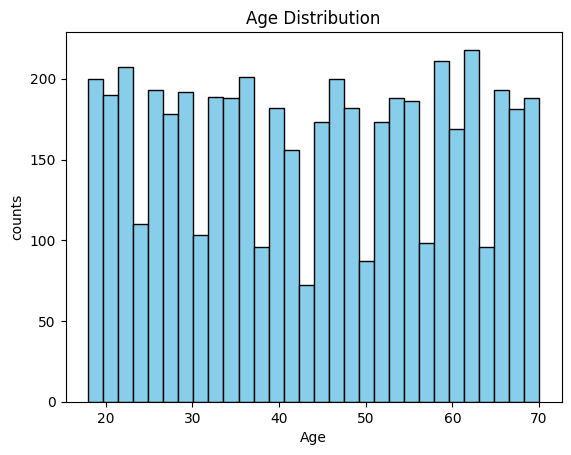

In [805]:
import matplotlib.pyplot as plt
plt.hist(df['age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('counts')
plt.show()

The age distribution of Netflix viewers in this dataset fluctuates across all ages. While some ages above 60 have relatively high user counts, users are spread throughout all age ranges, and there is no single group that dominates. The 'age' variable shows some unpredictable highs and lows, which means the distribution is uneven, not concentrated only among the very old or very young.

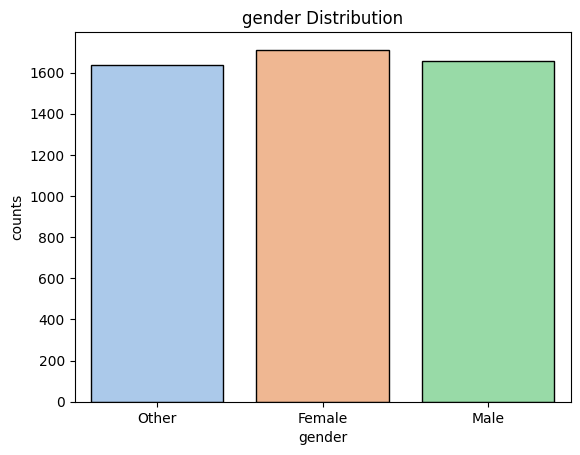

In [806]:
import matplotlib.pyplot as plt
sns.countplot(x='gender', data=df, palette='pastel', edgecolor='black')
plt.title('gender Distribution')
plt.xlabel('gender')
plt.ylabel('counts')
plt.show()

Female users are the largest group in  data, while Male and Other user counts are almost equal. This suggests higher activity or representation among Female users, with relative parity between the other two gender categories.

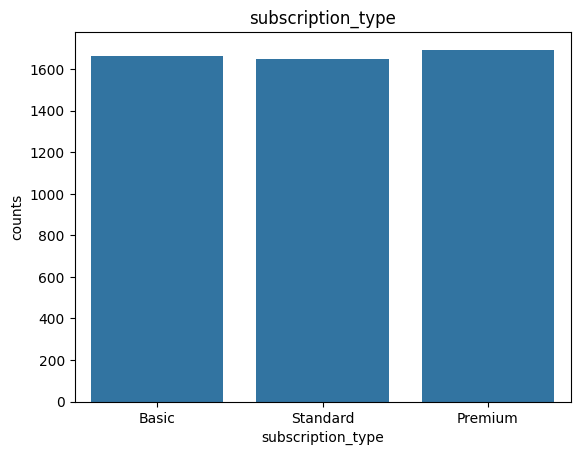

In [807]:
import matplotlib.pyplot as plt
sns.countplot(x='subscription_type', data=df)
plt.title('subscription_type')
plt.xlabel('subscription_type')
plt.ylabel('counts')
plt.show()

All three subscription types (Basic, Standard, Premium) have nearly the same number of users in  dataset, as indicated by the similar bar heights in  distribution plot. This balanced distribution is a strong foundation for further analysis.

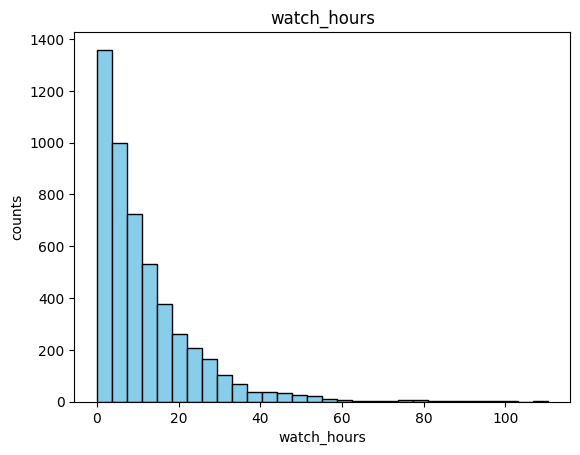

In [808]:
import matplotlib.pyplot as plt
plt.hist(df['watch_hours'], bins=30, color='skyblue', edgecolor='black')
plt.title('watch_hours')
plt.xlabel('watch_hours')
plt.ylabel('counts')
plt.show()

The distribution goes from many people with low watch hours to very few with high watch hours.

The plot is "right-skewed," meaning most values are on the left (low), with a long tail stretching rightward to higher numbers.

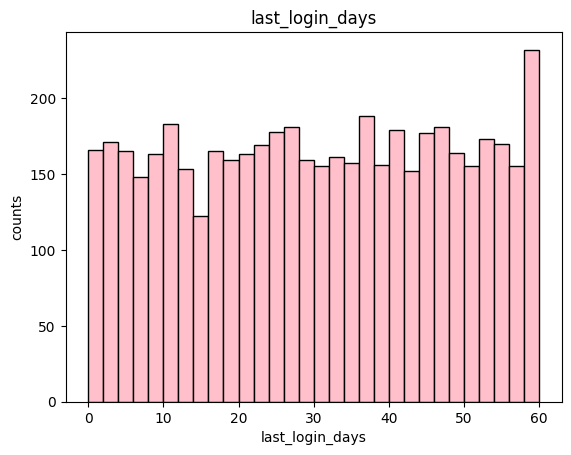

In [809]:
import matplotlib.pyplot as plt
plt.hist(df['last_login_days'], bins=30, color='pink', edgecolor='black')
plt.title('last_login_days')
plt.xlabel('last_login_days')
plt.ylabel('counts')
plt.show()


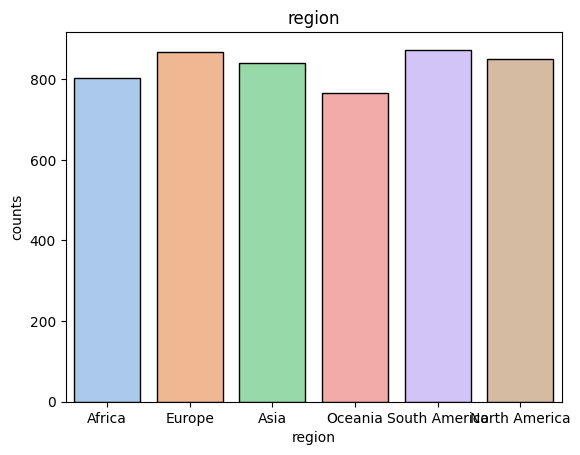

In [810]:
import matplotlib.pyplot as plt
sns.countplot(x='region', data=df, palette='pastel', edgecolor='black')
plt.title('region')
plt.xlabel('region')
plt.ylabel('counts')
plt.show()


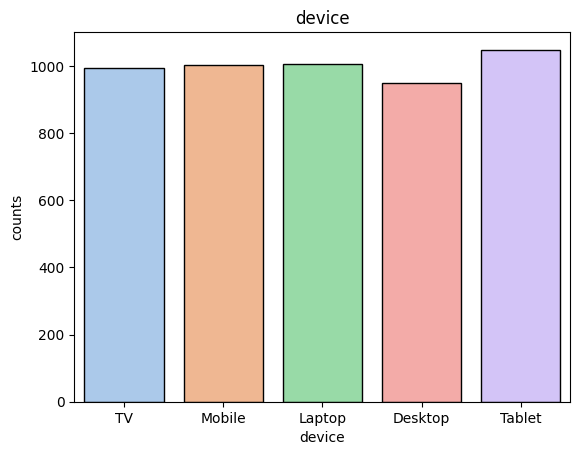

In [811]:
import matplotlib.pyplot as plt
sns.countplot(x='device', data=df, palette='pastel', edgecolor='black')
plt.title('device')
plt.xlabel('device')
plt.ylabel('counts')
plt.show()


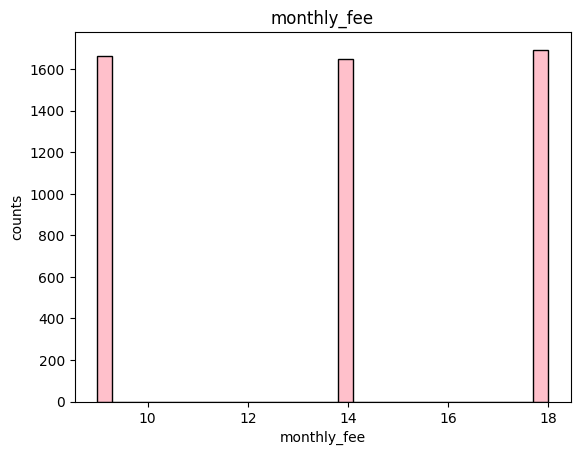

In [812]:
import matplotlib.pyplot as plt
plt.hist(df['monthly_fee'], bins=30, color='pink', edgecolor='black')
plt.title('monthly_fee')
plt.xlabel('monthly_fee')
plt.ylabel('counts')
plt.show()


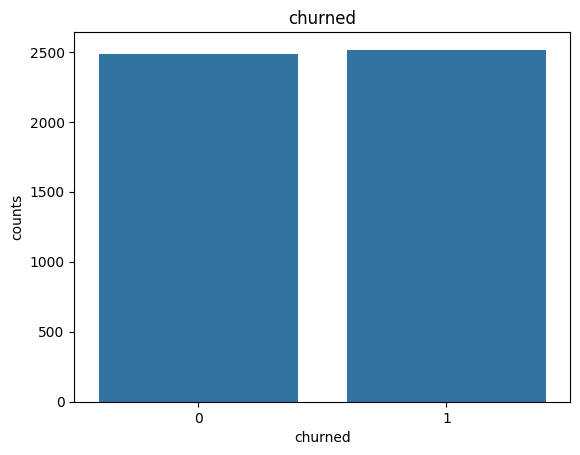

In [813]:
import matplotlib.pyplot as plt
sns.countplot(x='churned', data=df)
plt.title('churned')
plt.xlabel('churned')
plt.ylabel('counts')
plt.show()


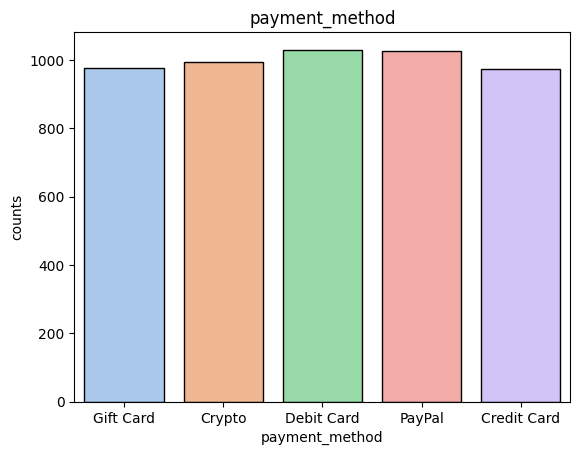

In [814]:
import matplotlib.pyplot as plt
sns.countplot(x='payment_method', data=df, palette='pastel', edgecolor='black')
plt.title('payment_method')
plt.xlabel('payment_method')
plt.ylabel('counts')
plt.show()


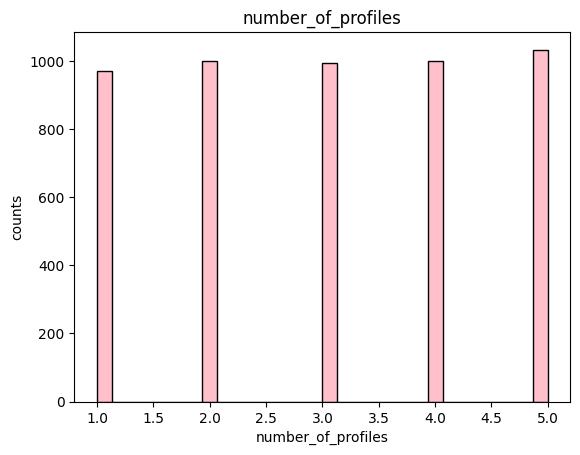

In [815]:
import matplotlib.pyplot as plt
plt.hist(df['number_of_profiles'], bins=30, color='pink', edgecolor='black')
plt.title('number_of_profiles')
plt.xlabel('number_of_profiles')
plt.ylabel('counts')
plt.show()


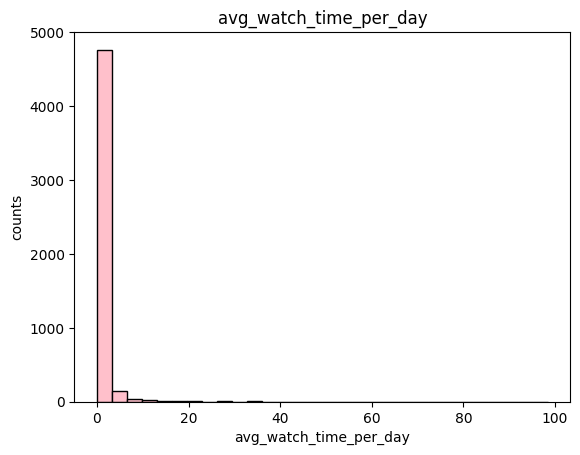

In [816]:
import matplotlib.pyplot as plt
plt.hist(df['avg_watch_time_per_day'], bins=30, color='pink', edgecolor='black')
plt.title('avg_watch_time_per_day')
plt.xlabel('avg_watch_time_per_day')
plt.ylabel('counts')
plt.show()


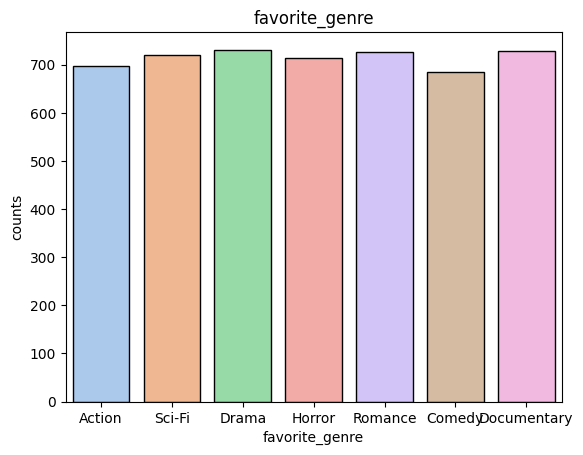

In [817]:
import matplotlib.pyplot as plt
sns.countplot(x='favorite_genre', data=df, palette='pastel', edgecolor='black')
plt.title('favorite_genre')
plt.xlabel('favorite_genre')
plt.ylabel('counts')
plt.show()


In [818]:
print(df[['age', 'gender', 'subscription_type', 'watch_hours', 'last_login_days', 'region', 'device', 'monthly_fee', 'churned', 'payment_method', 'number_of_profiles', 'avg_watch_time_per_day', 'favorite_genre']].value_counts().sort_index())

age  gender  subscription_type  watch_hours  last_login_days  region         device  monthly_fee  churned  payment_method  number_of_profiles  avg_watch_time_per_day  favorite_genre
18   Female  Basic              0.33         28               Oceania        Tablet  8.99         1        PayPal          3                   0.01                    Action            1
                                0.75         11               Africa         Laptop  8.99         1        Crypto          5                   0.06                    Romance           1
                                1.82         46               South America  Tablet  8.99         1        Credit Card     3                   0.04                    Romance           1
                                1.97         46               South America  TV      8.99         1        Crypto          2                   0.04                    Action            1
                                3.19         16               North Am

# BIVARIATE ANALYSIS for continuous/numeric columns

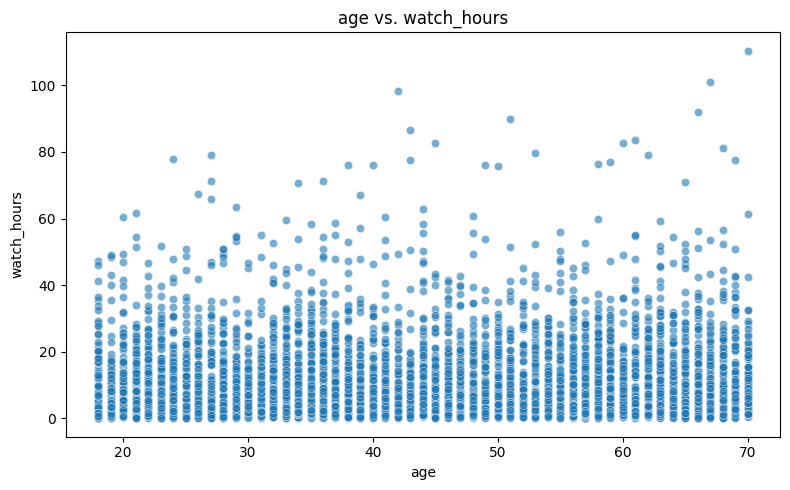

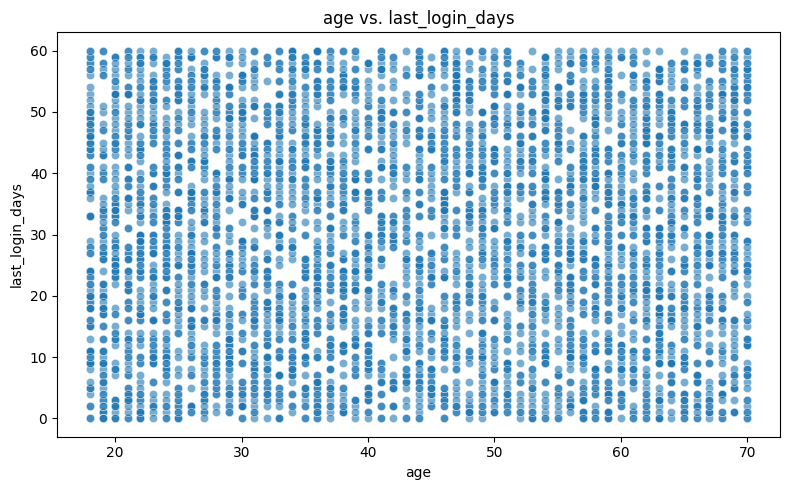

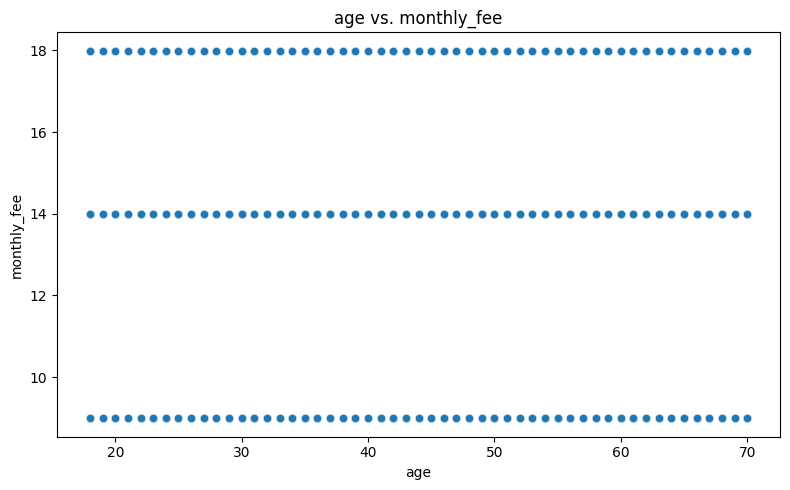

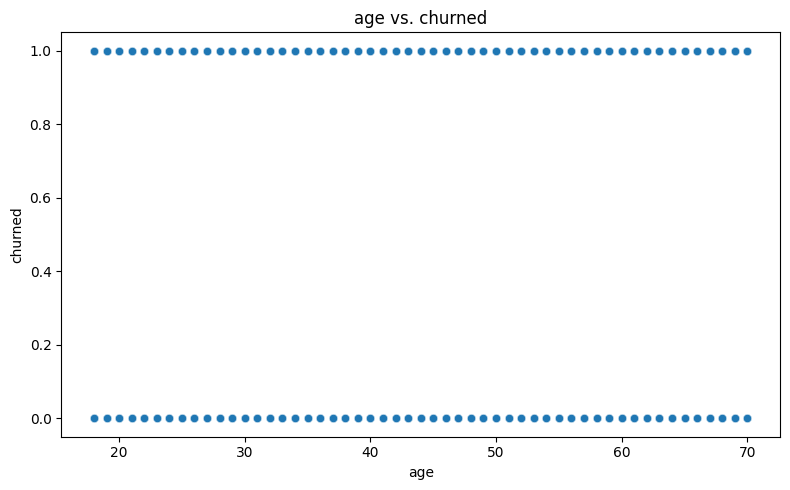

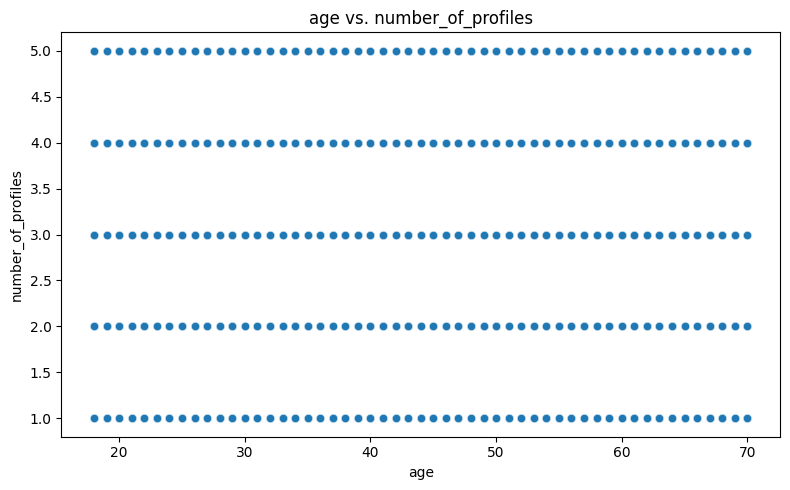

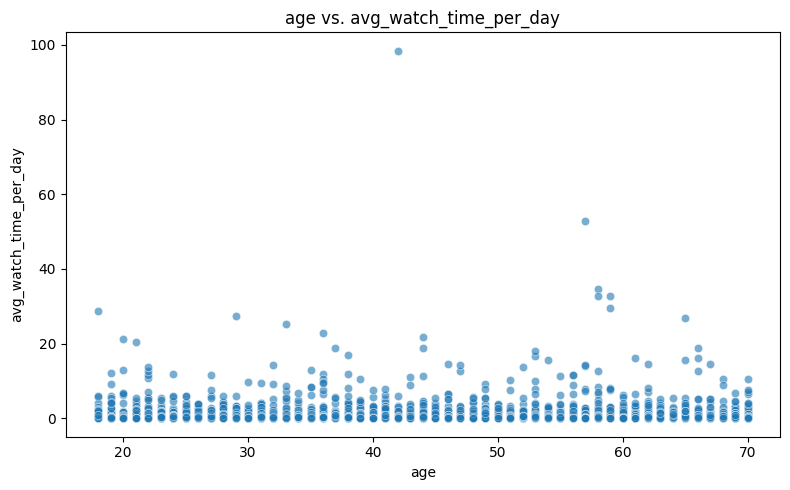

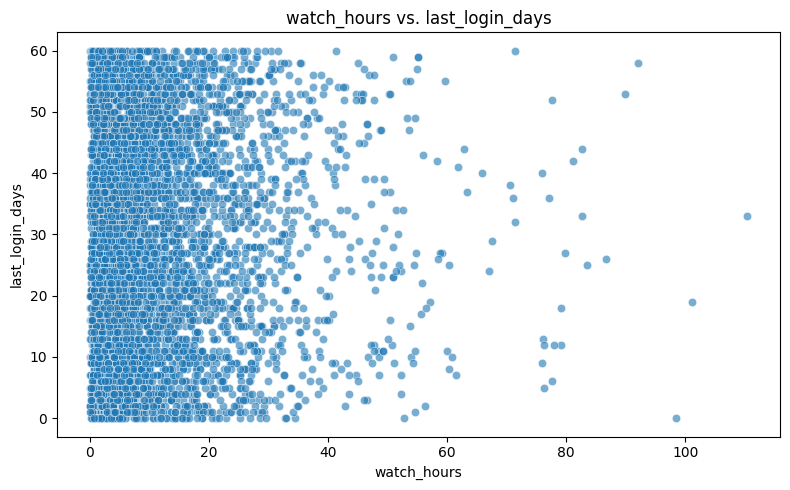

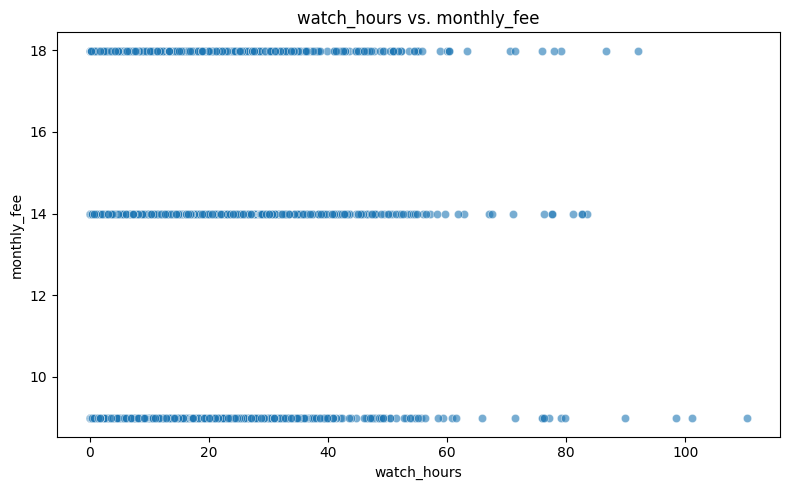

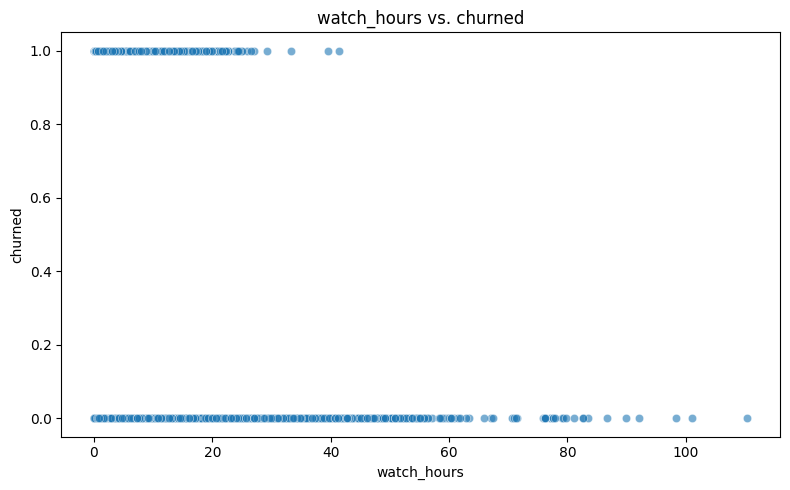

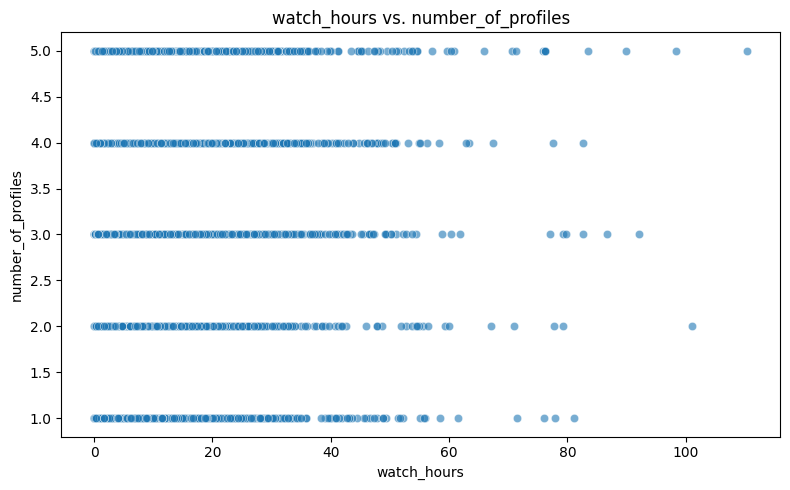

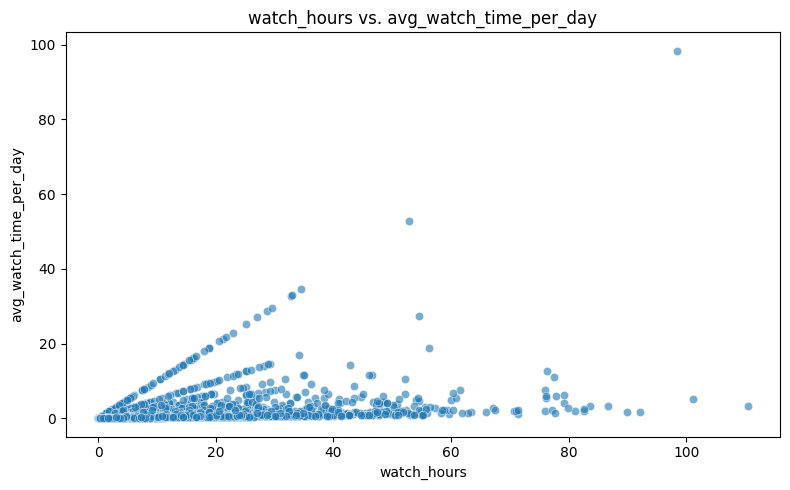

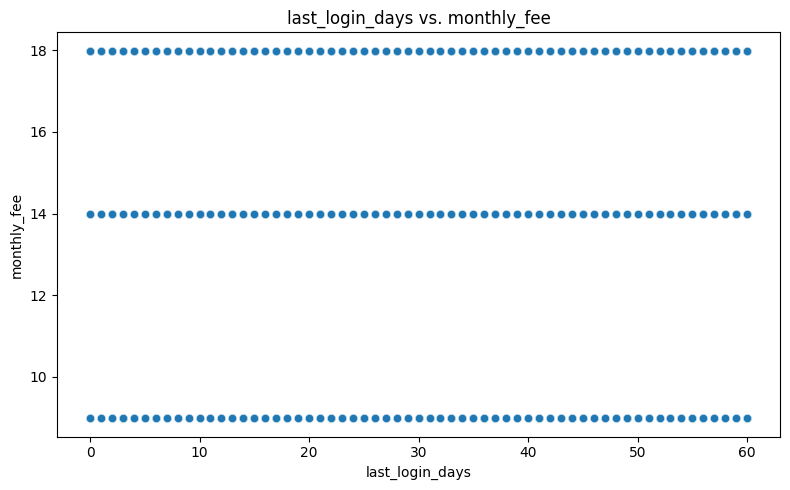

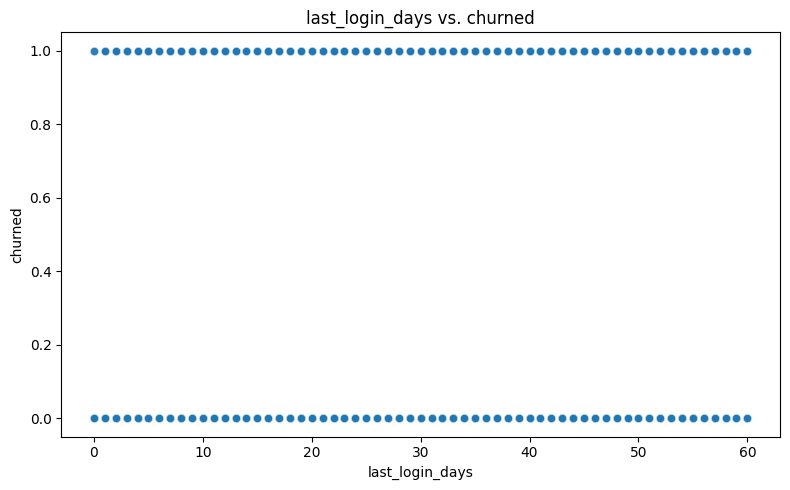

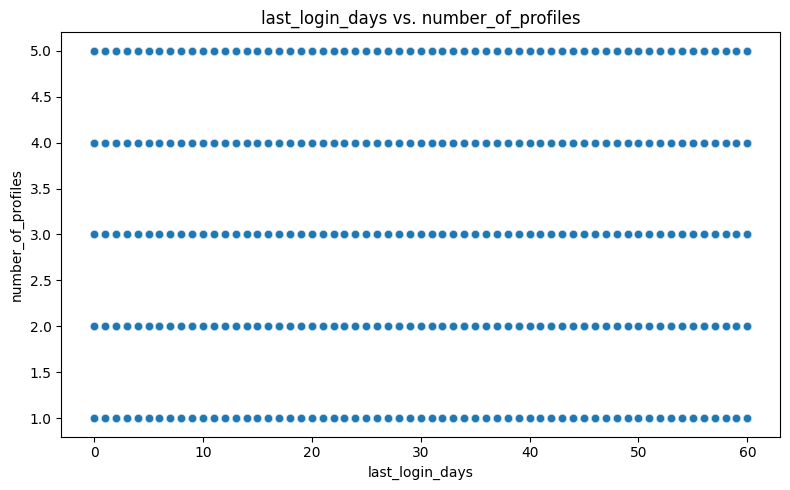

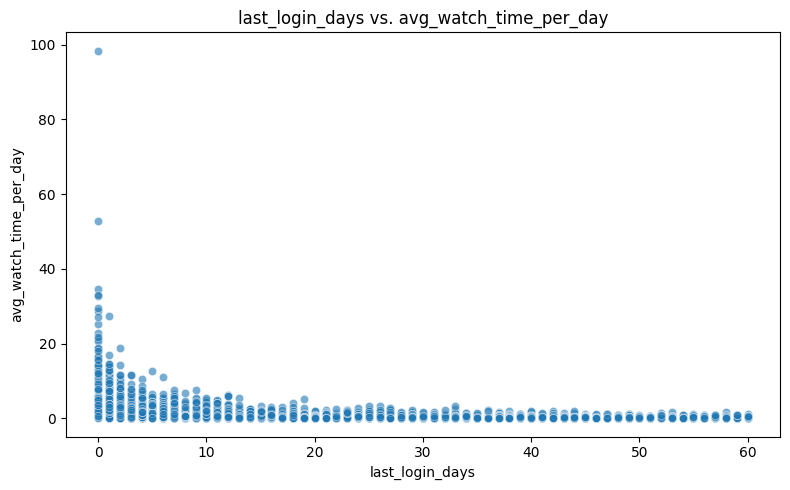

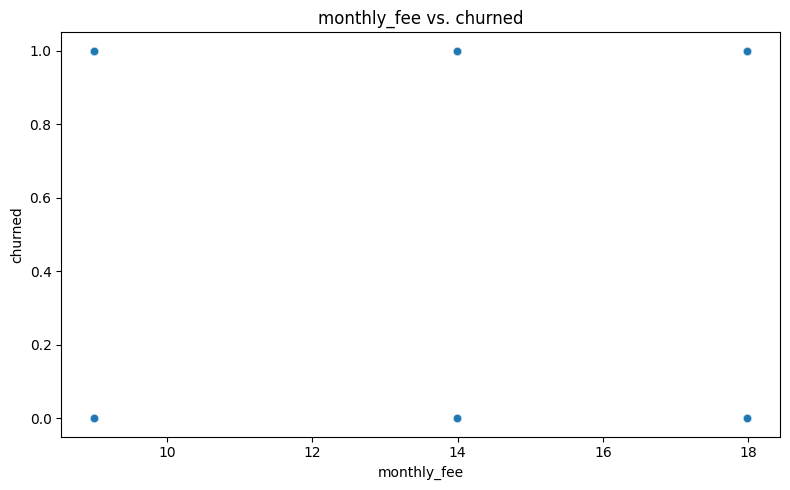

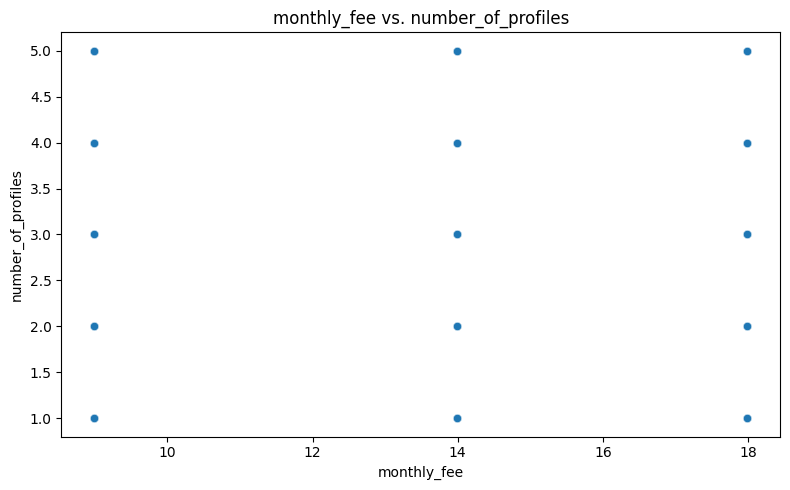

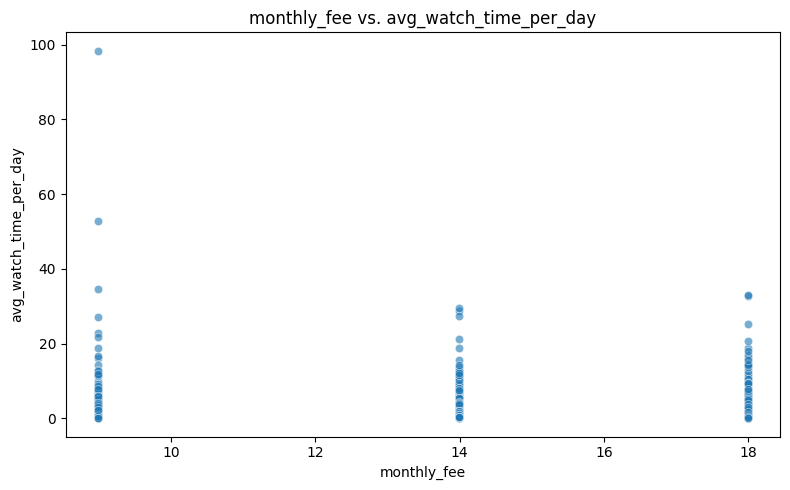

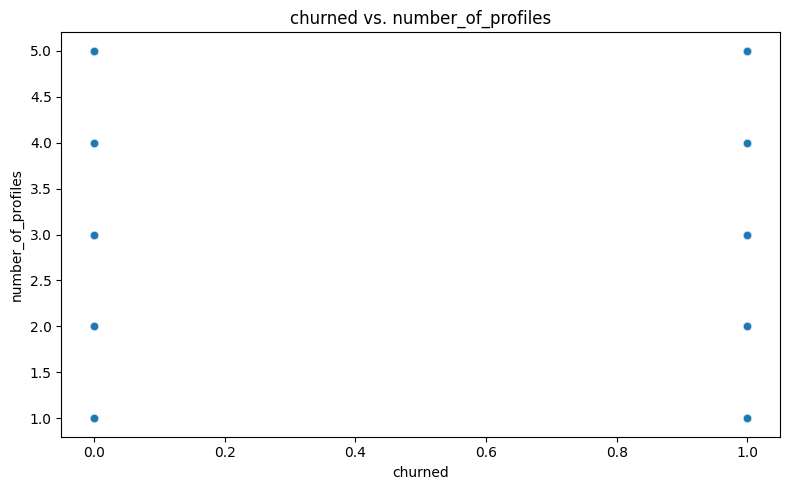

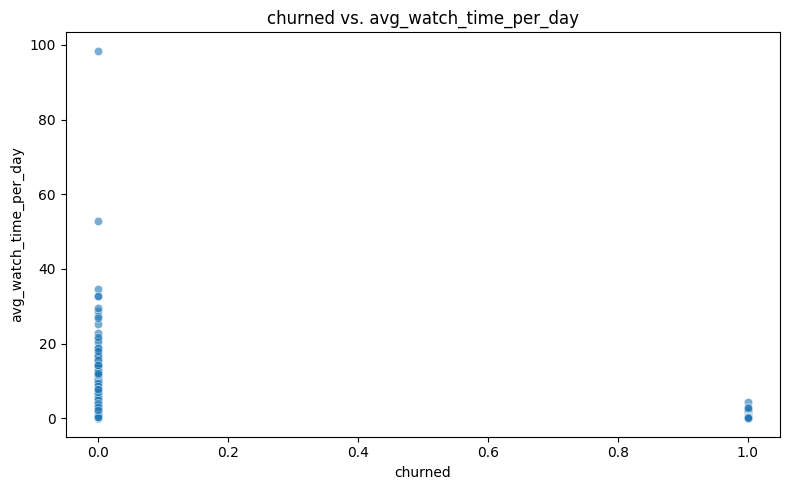

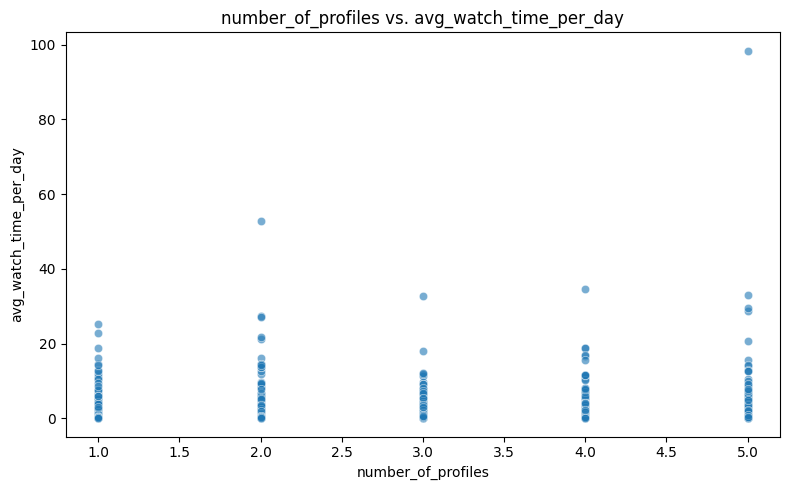

In [819]:
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

# Select continuous/numeric columns
continuous_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Loop through all unique pairs of continuous columns
for col1, col2 in itertools.combinations(continuous_cols, 2):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=col1, y=col2, data=df, alpha=0.6)
    plt.title(f'{col1} vs. {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.tight_layout()
    plt.show()

In [820]:
print(df.columns.tolist())

['age', 'gender', 'subscription_type', 'watch_hours', 'last_login_days', 'region', 'device', 'monthly_fee', 'churned', 'payment_method', 'number_of_profiles', 'avg_watch_time_per_day', 'favorite_genre']


## Bivariate analysis for categorical column

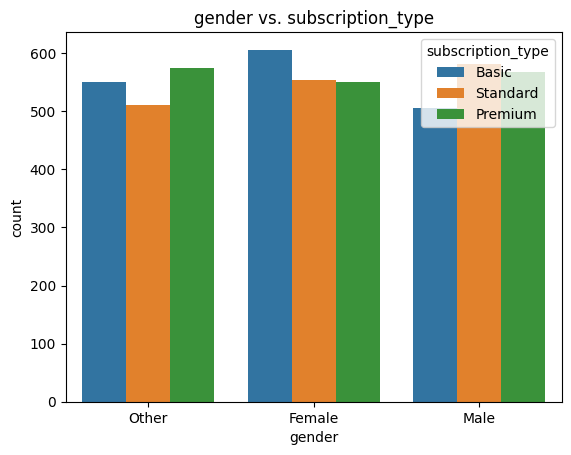

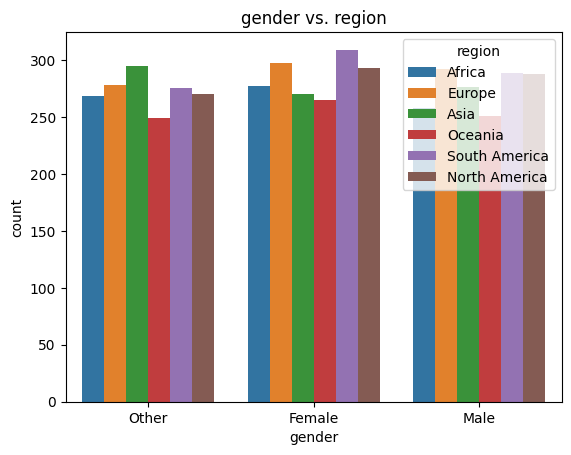

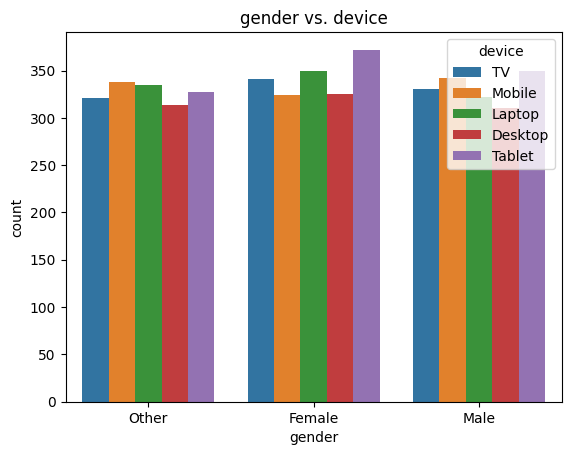

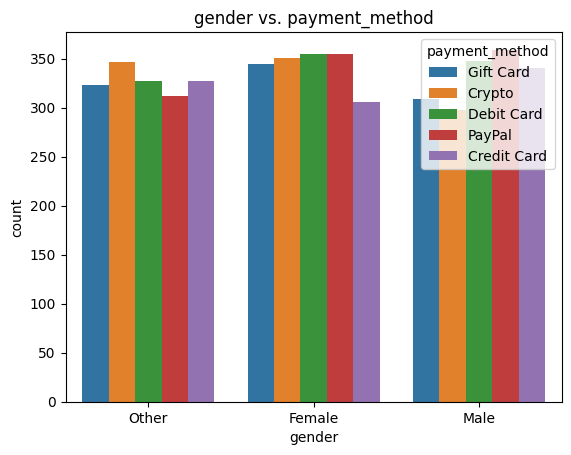

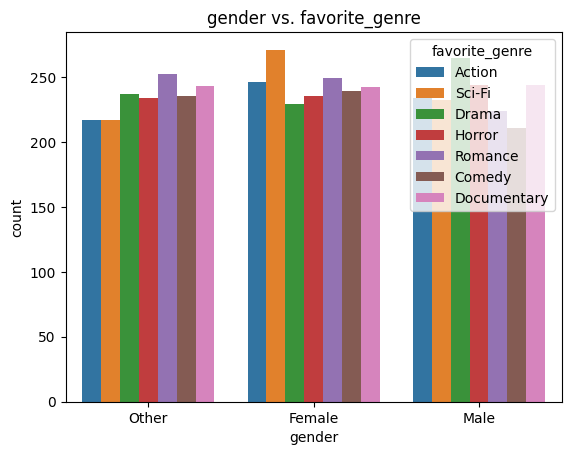

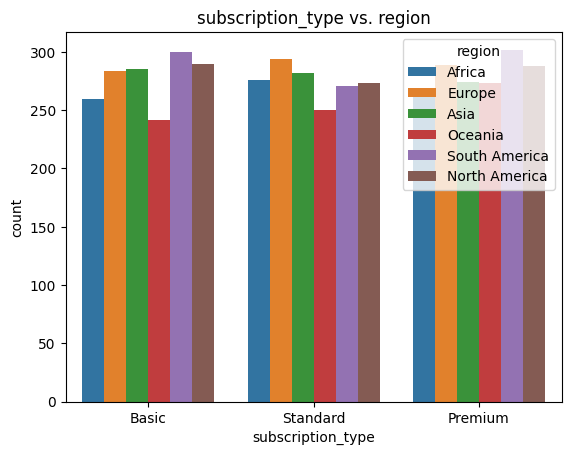

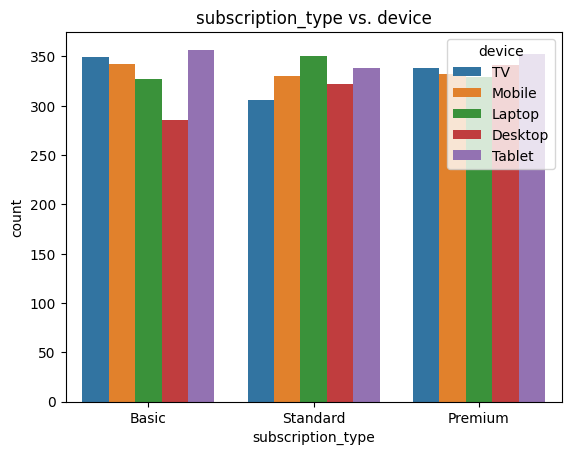

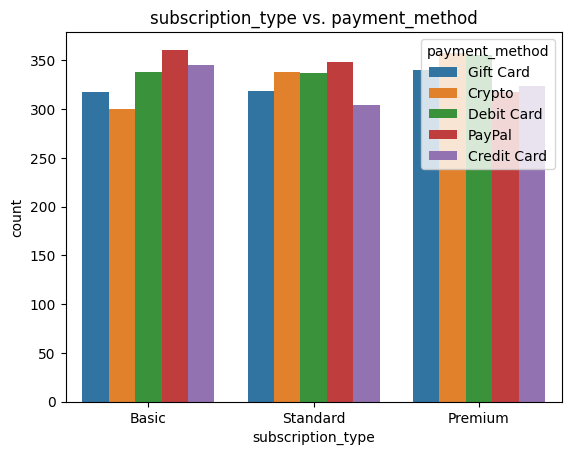

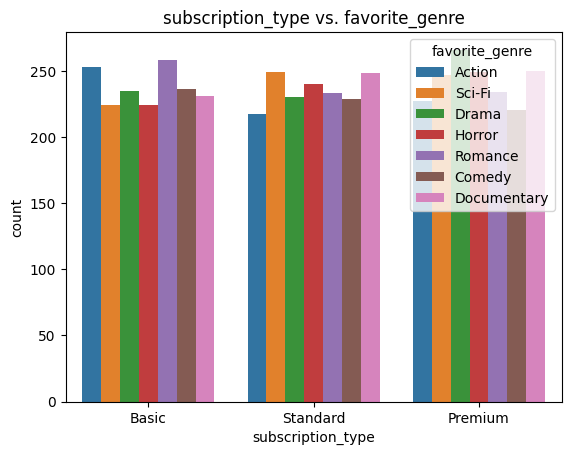

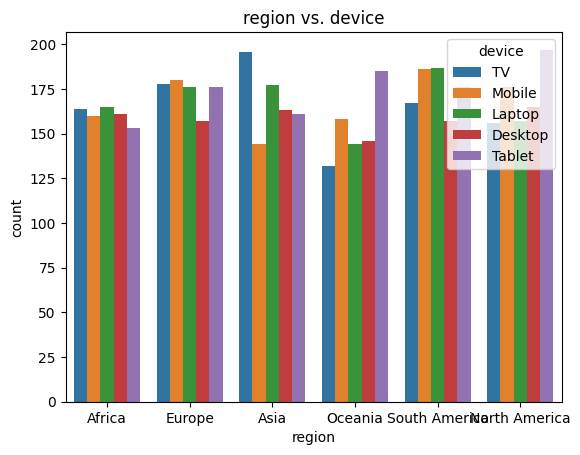

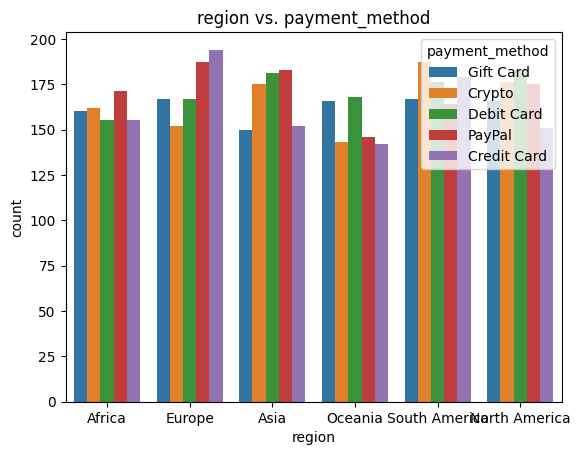

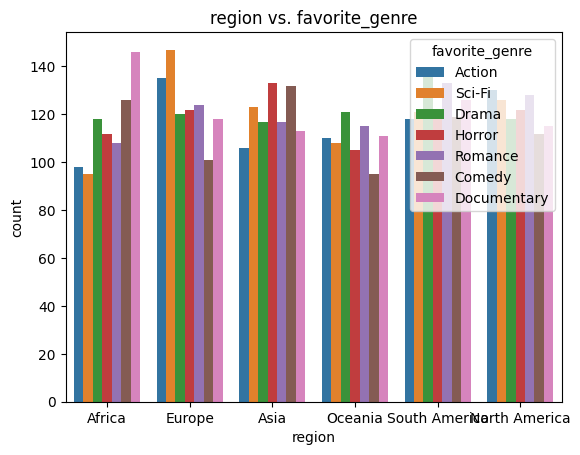

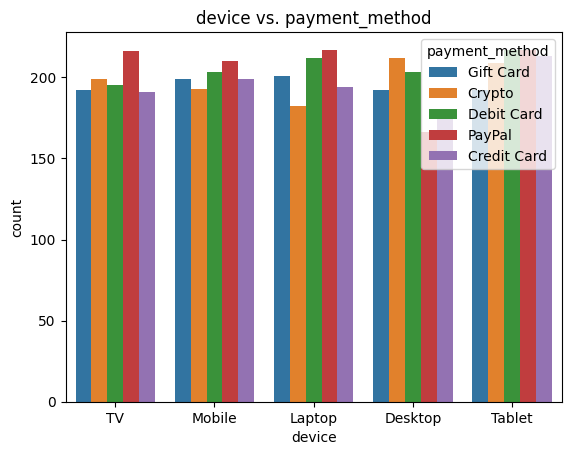

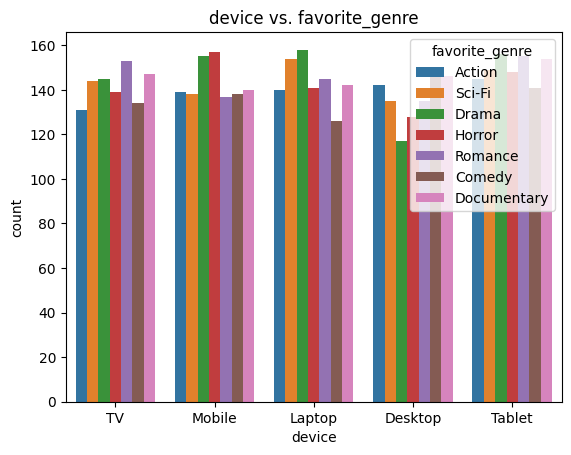

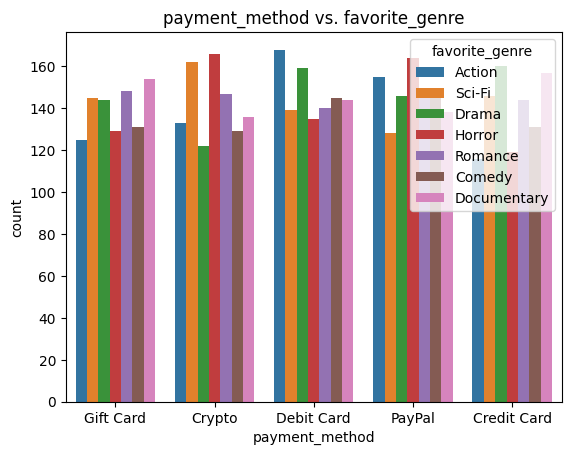

In [821]:
import itertools

categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Loop through all unique pairs
for col1, col2 in itertools.combinations(categorical_cols, 2):
    sns.countplot(x=col1, hue=col2, data=df)
    plt.title(f'{col1} vs. {col2}')
    plt.show()


Based on the analysis, in the categorical combination of variables, most of the 600 female users are using the Netflix service under the Basic subscription.
Around 580 Other users are using the service under the Premium subscription.
Similarly, 580 Male users are using the Netflix service under the Basic subscription.
Therefore, the number of Male and Other users using the service is the same, but the subscription types are different.


In the categorical combination of gender and device, most people categorized as 'Other' are using mobile devices to access Netflix, though some also use laptops. Between these two device types, the difference is slight for this group. Among females, tablets are the most commonly used device for accessing Netflix. Some female users also use other devices, but tablets are used most frequently by them. Male users also use tablets, but compared to females, the usage is lower. Female users show the highest preference for tablets among all gender groups.


Among the 'Other', 'Female', and 'Male' groups, 'Other' users mostly use cryptocurrency for making payments. Female users use almost all payment methods except credit cards, with slight differences in the number of users across methods. They commonly use gift cards, crypto, debit cards, and PayPal. Most male users prefer PayPal for making payments. Overall, while all gender groups use different payment methods, males tend to prefer PayPal, and females use a variety of methods except credit cards.

In the combination of gender and favorite genre, a high number of 'Other' users prefer watching romance movies, although they also watch other genres. Female users mostly prefer sci-fi, while male users primarily watch drama. Compared to all gender groups, sci-fi is most popular among female users.

# Bivariate analysis for continuous column

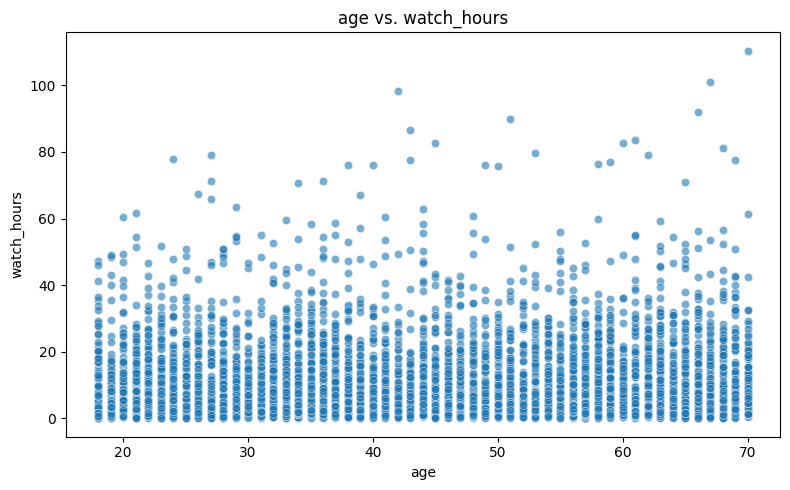

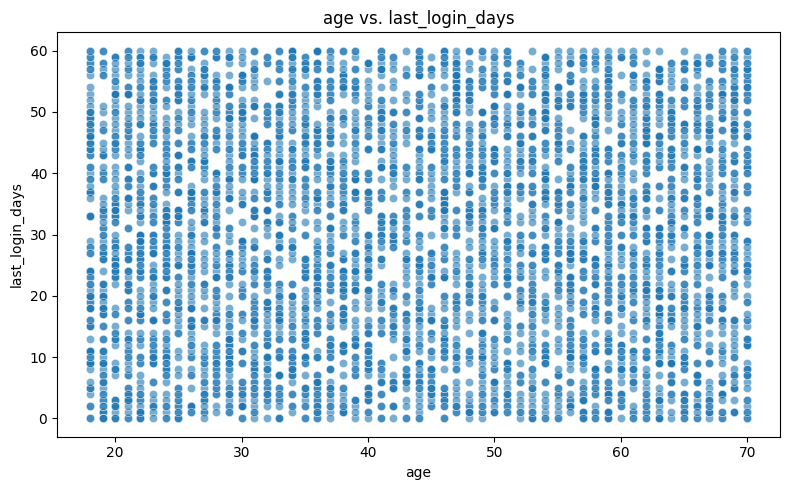

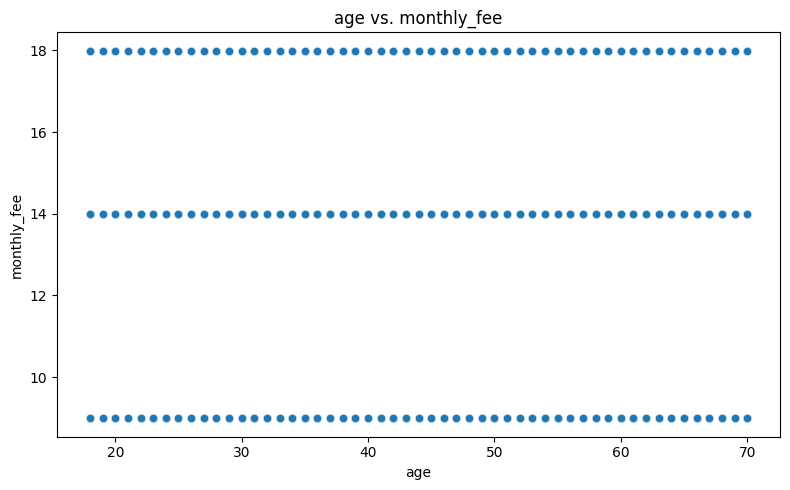

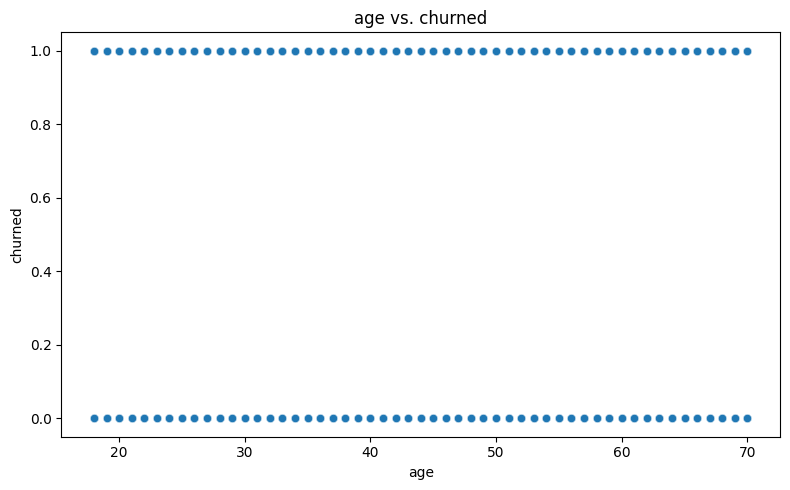

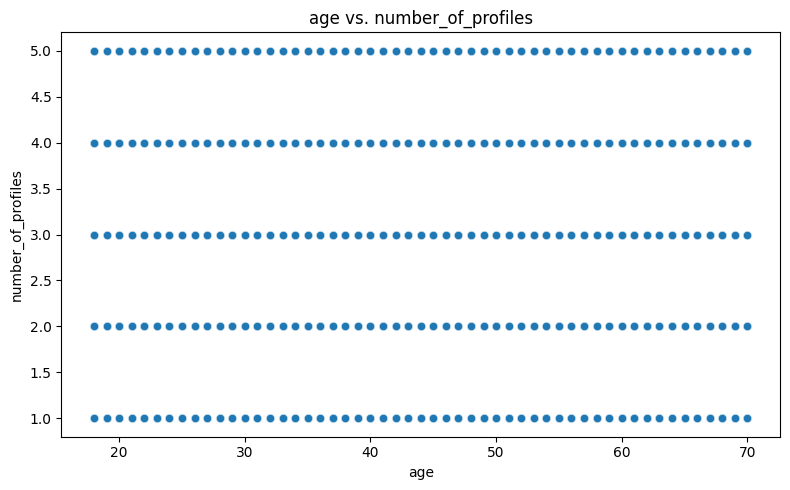

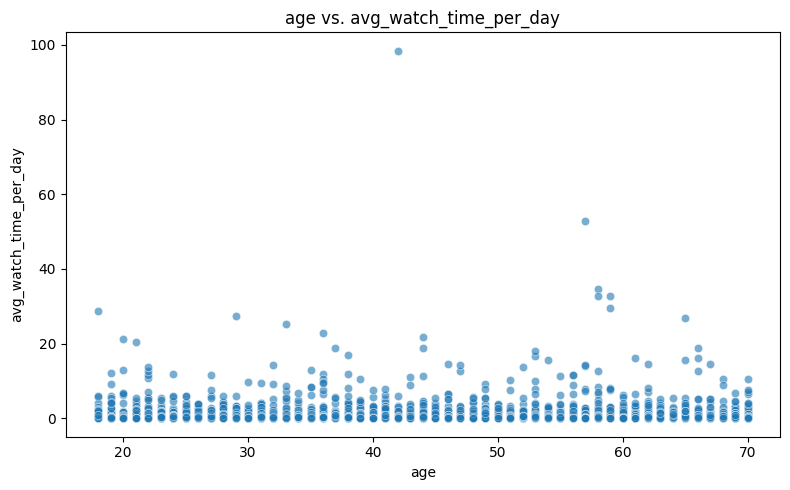

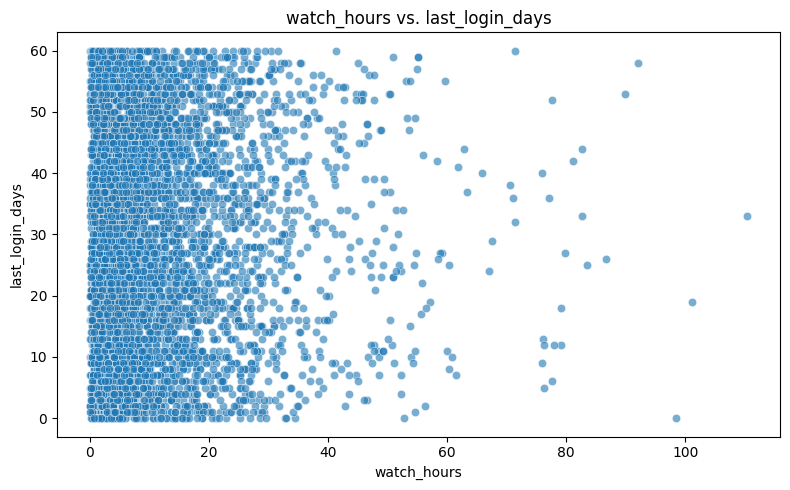

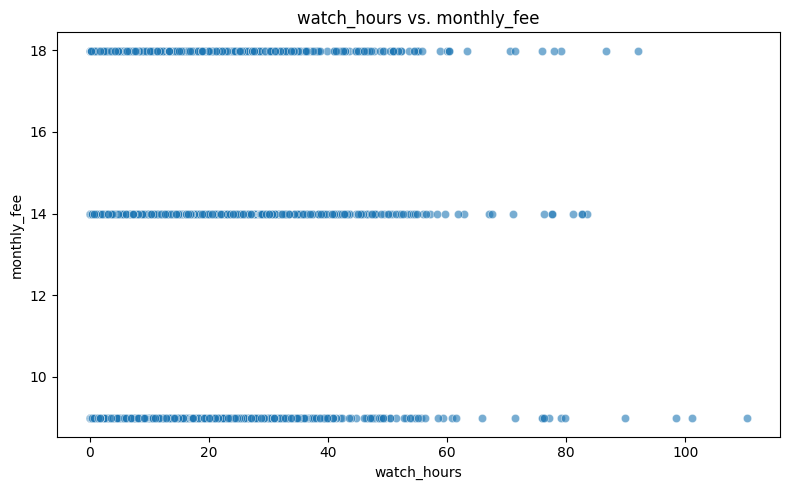

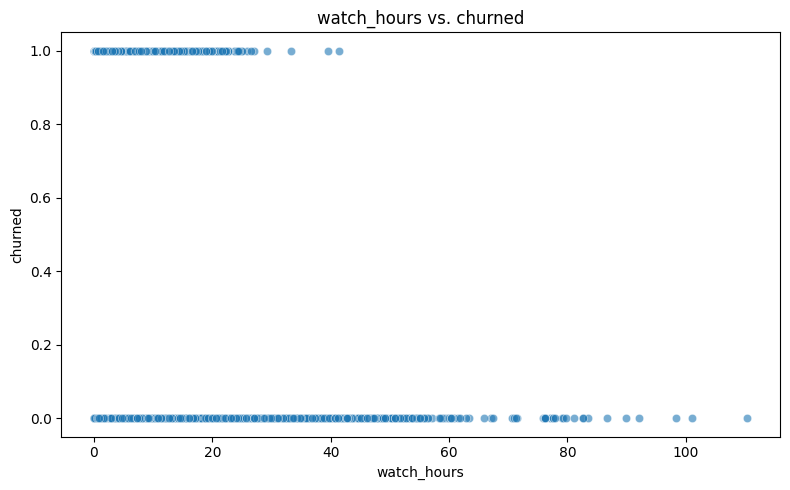

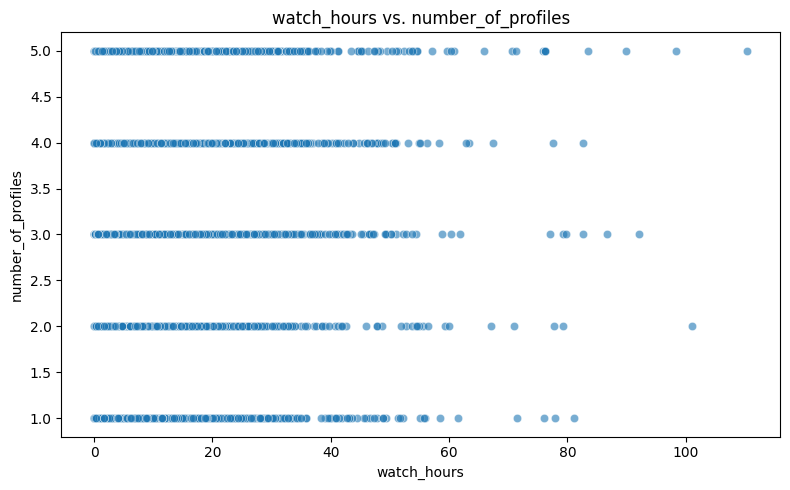

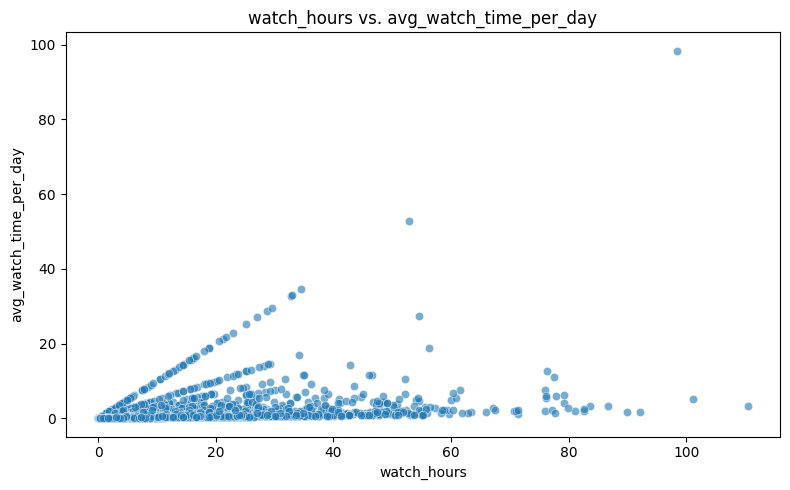

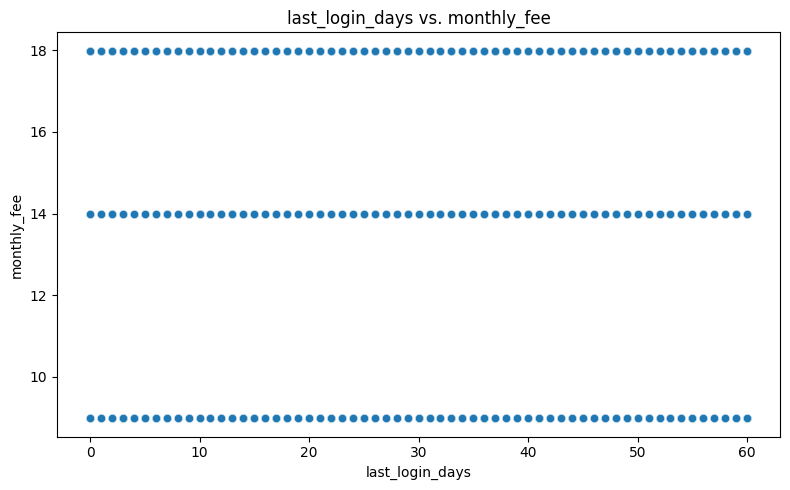

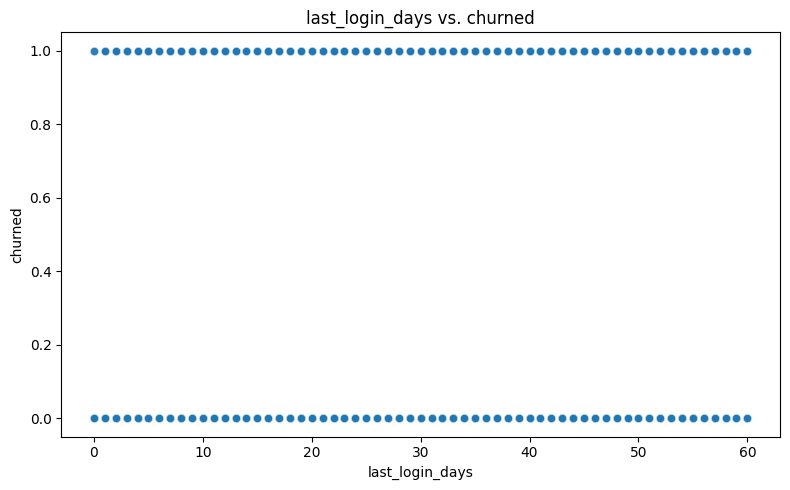

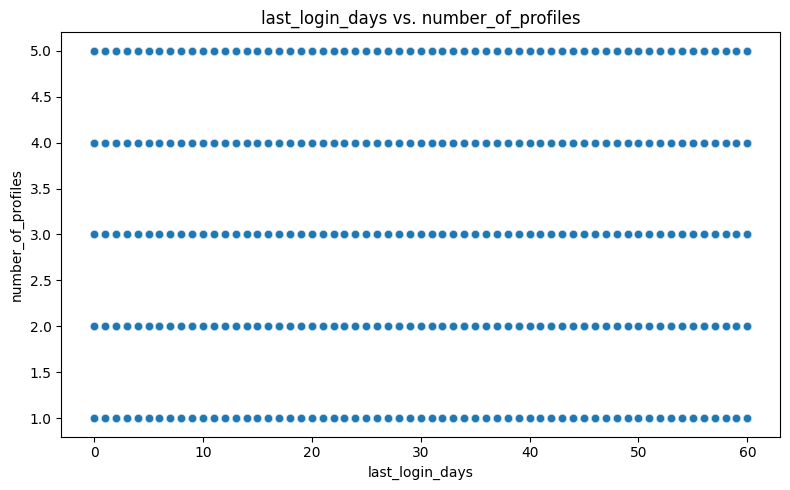

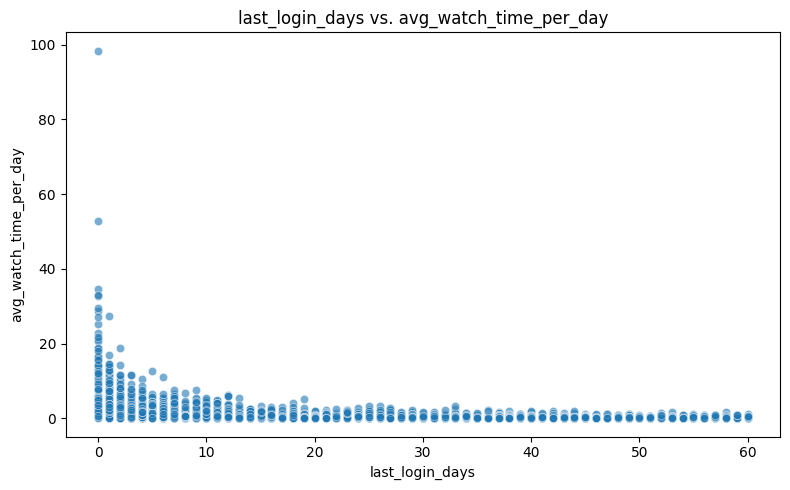

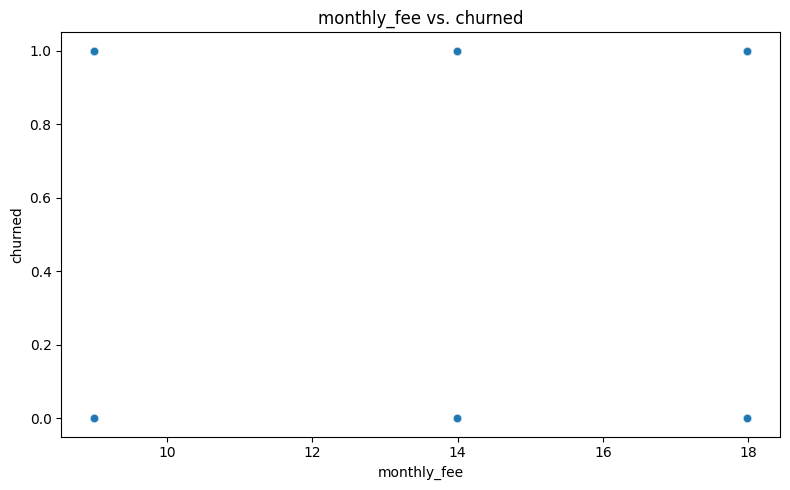

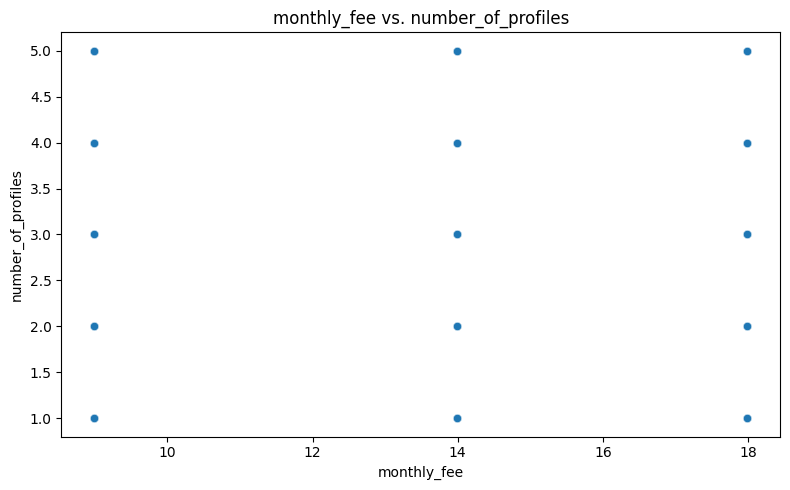

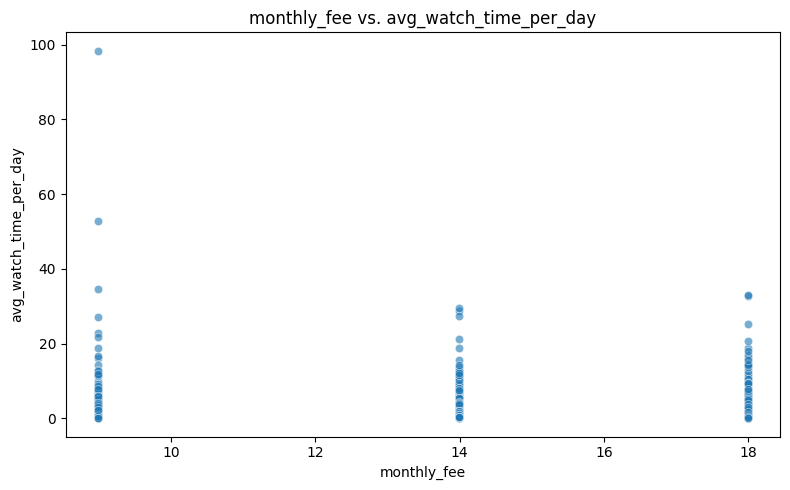

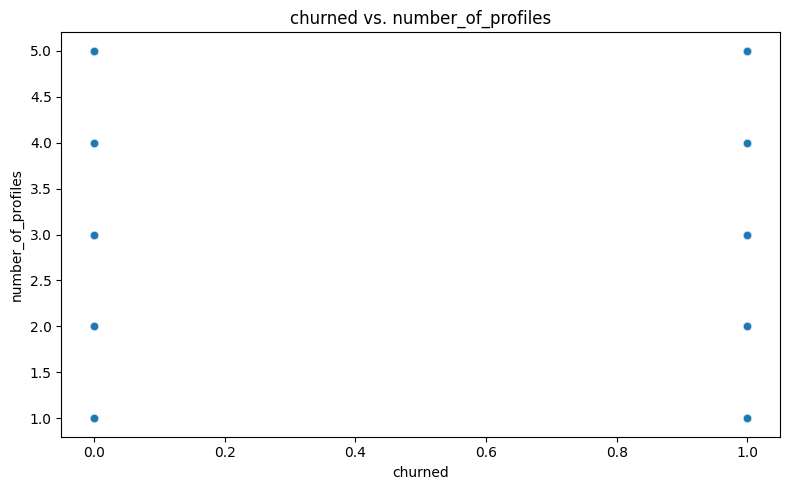

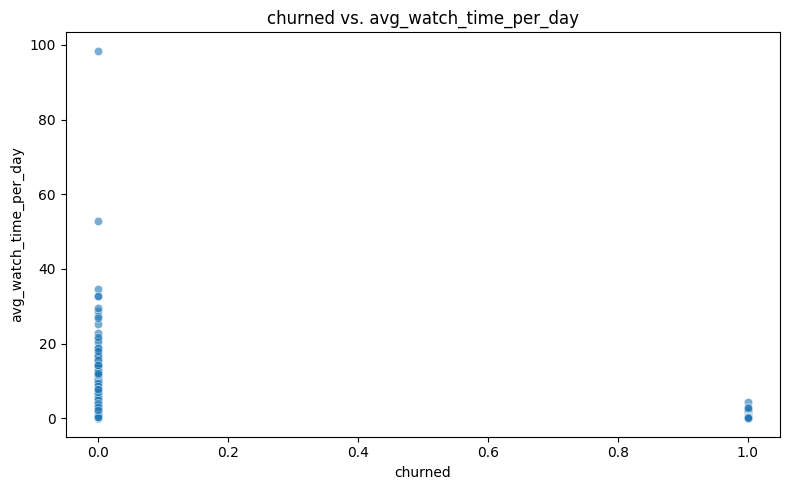

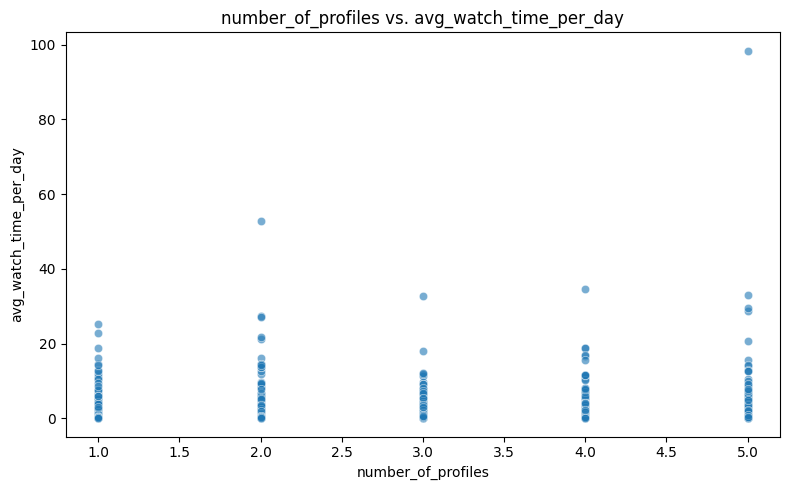

In [822]:
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

# Select continuous/numeric columns
continuous_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Loop through all unique pairs of continuous columns
for col1, col2 in itertools.combinations(continuous_cols, 2):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=col1, y=col2, data=df, alpha=0.6)
    plt.title(f'{col1} vs. {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.tight_layout()
    plt.show()

In [823]:
print(df.columns.tolist())

['age', 'gender', 'subscription_type', 'watch_hours', 'last_login_days', 'region', 'device', 'monthly_fee', 'churned', 'payment_method', 'number_of_profiles', 'avg_watch_time_per_day', 'favorite_genre']


## MULTIVARIATE ANALYSIS:

📊 Pairplot: Numeric Variable Relationships


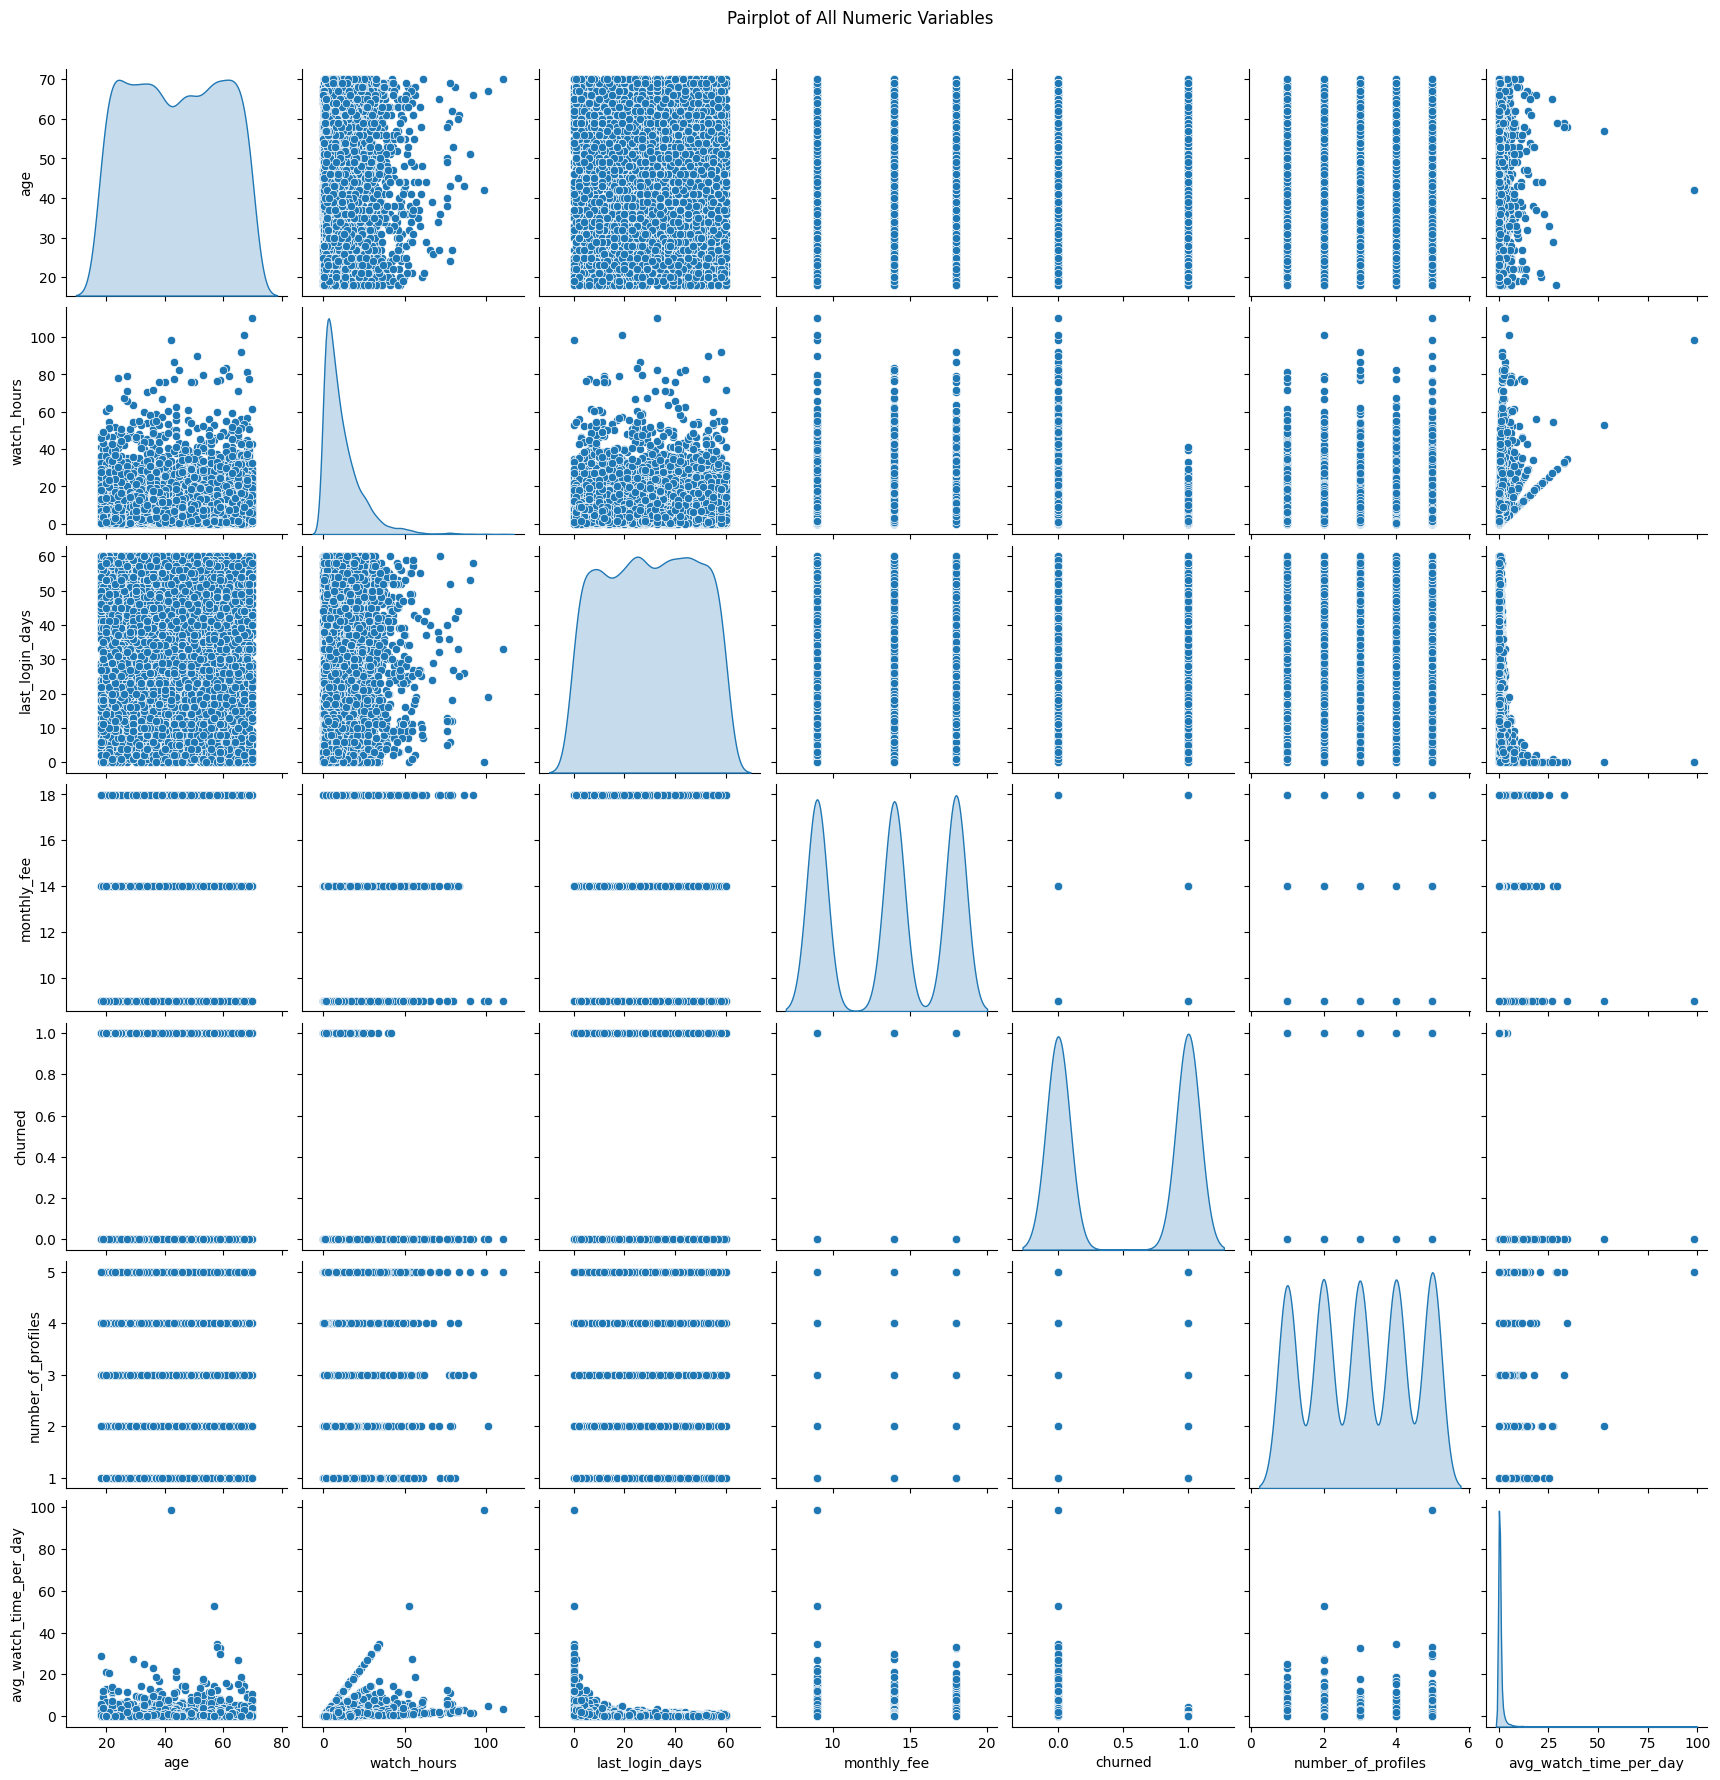

In [824]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# df = pd.read_csv("your_dataset.csv")

# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# 1️⃣ Pairplot for all numeric variables
print("📊 Pairplot: Numeric Variable Relationships")
sns.pairplot(df[numeric_cols], diag_kind='kde')
plt.suptitle('Pairplot of All Numeric Variables', y=1.02)
plt.show()




# Heatmap for correlation between numeric variables

📈 Correlation Heatmap


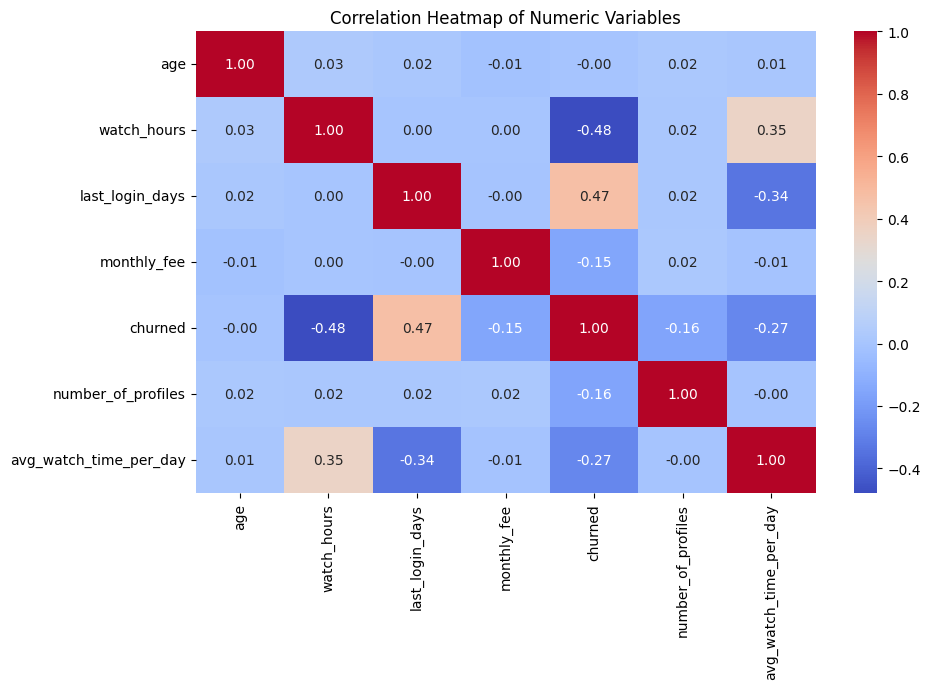

In [825]:

print("📈 Correlation Heatmap")
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

In [826]:
df.shape

(5000, 13)

In [827]:
print(df.columns.tolist())

['age', 'gender', 'subscription_type', 'watch_hours', 'last_login_days', 'region', 'device', 'monthly_fee', 'churned', 'payment_method', 'number_of_profiles', 'avg_watch_time_per_day', 'favorite_genre']


## CHECKING THE OUTLIER FOR CONTINOUS COLUMN

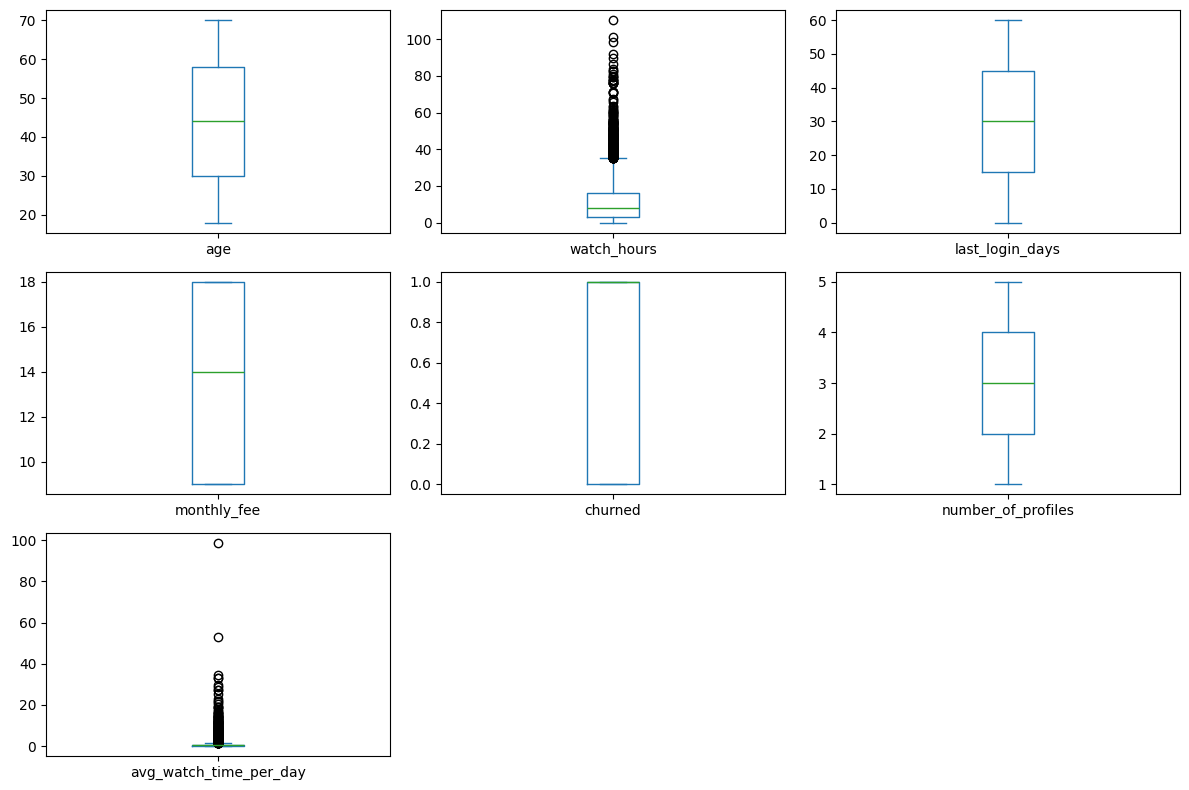

In [828]:
# Only plot boxplots for numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Make boxplots
numeric_cols.plot(kind='box', subplots=True, layout=(3, 3), figsize=(12, 8), sharex=False, sharey=False)
plt.tight_layout()
plt.show()


### in continous variable ,some column has outlier those are watch hours and avg_watch_time_per_day

# CHECKING THE COUNTS OF CATEGORICAL VARIABLES AND CONTINUOUS VARIABLE

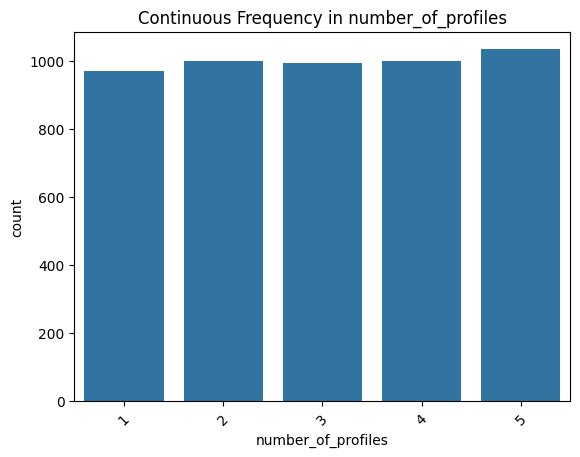

In [829]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for the 'region' column
sns.countplot(x='number_of_profiles', data=df)
plt.title('Continuous Frequency in number_of_profiles')
plt.xticks(rotation=45)  # rotates labels if they are long
plt.show()

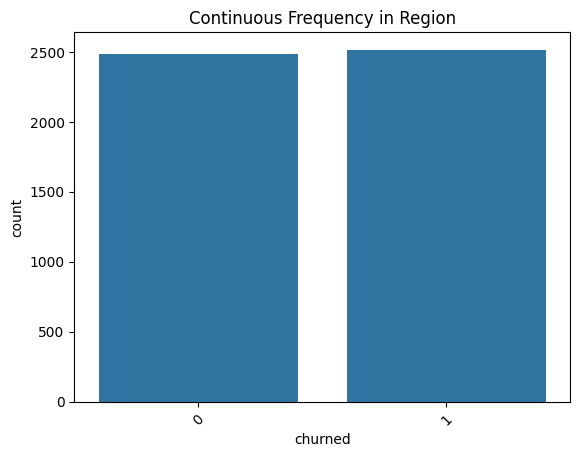

In [830]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for the 'region' column
sns.countplot(x='churned', data=df)
plt.title('Continuous Frequency in Region')
plt.xticks(rotation=45)  # rotates labels if they are long
plt.show()

##   CHECKING THE COUNTS FOR  CATEGORICAL  COLUMN

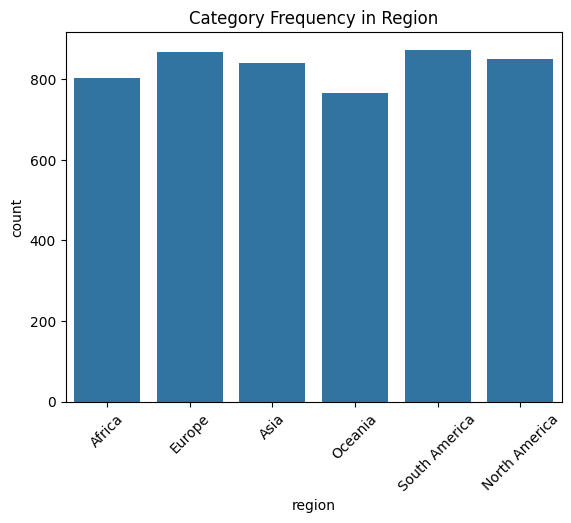

In [831]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for the 'region' column
sns.countplot(x='region', data=df)
plt.title('Category Frequency in Region')
plt.xticks(rotation=45)  # rotates labels if they are long
plt.show()

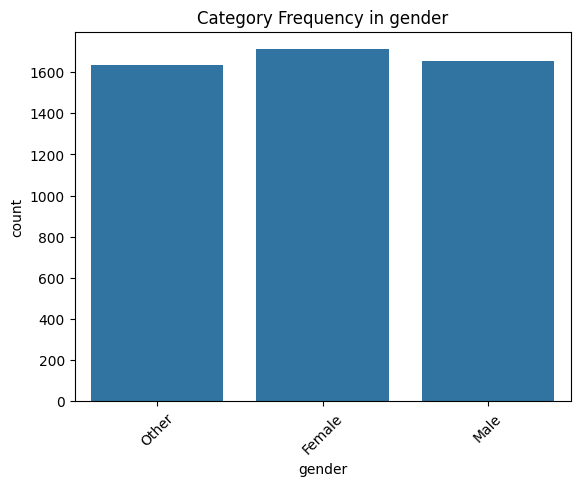

In [832]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for the 'region' column
sns.countplot(x='gender', data=df)
plt.title('Category Frequency in gender')
plt.xticks(rotation=45)  # rotates labels if they are long
plt.show()

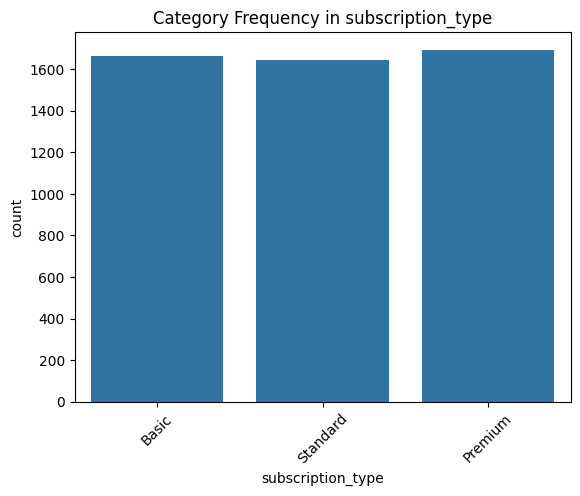

In [833]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for the 'region' column
sns.countplot(x='subscription_type', data=df)
plt.title('Category Frequency in subscription_type')
plt.xticks(rotation=45)  # rotates labels if they are long
plt.show()

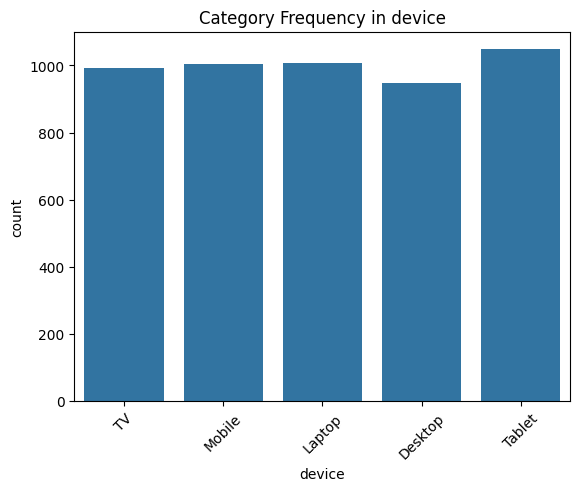

In [834]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for the 'region' column
sns.countplot(x='device', data=df)
plt.title('Category Frequency in device')
plt.xticks(rotation=45)  # rotates labels if they are long
plt.show()

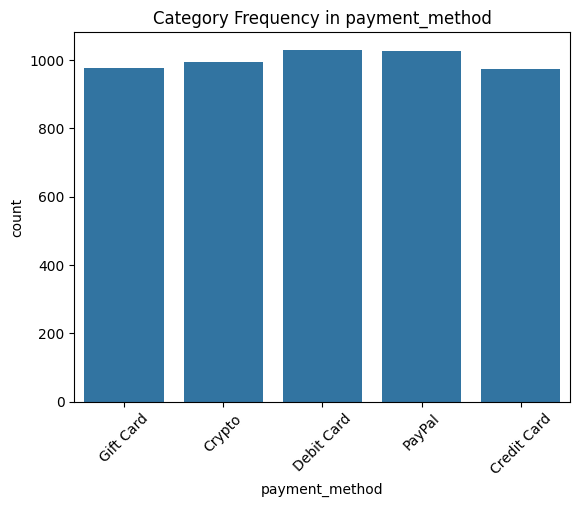

In [835]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for the 'region' column
sns.countplot(x='payment_method', data=df)
plt.title('Category Frequency in payment_method')
plt.xticks(rotation=45)  # rotates labels if they are long
plt.show()

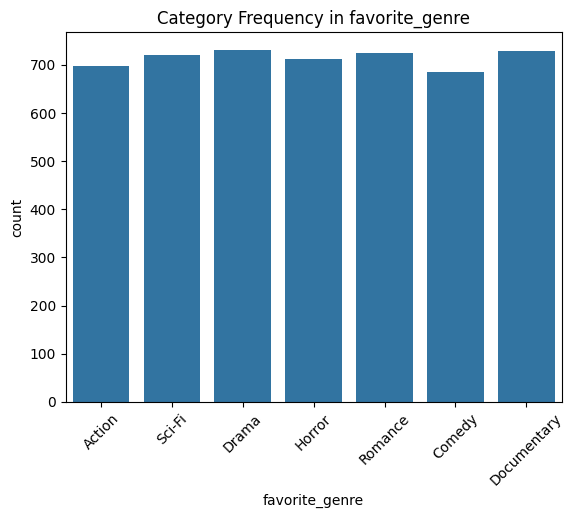

In [836]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for the 'region' column
sns.countplot(x='favorite_genre', data=df)
plt.title('Category Frequency in favorite_genre')
plt.xticks(rotation=45)  # rotates labels if they are long
plt.show()

## **Below checking the distribution of the numerical variables for each continuos column**

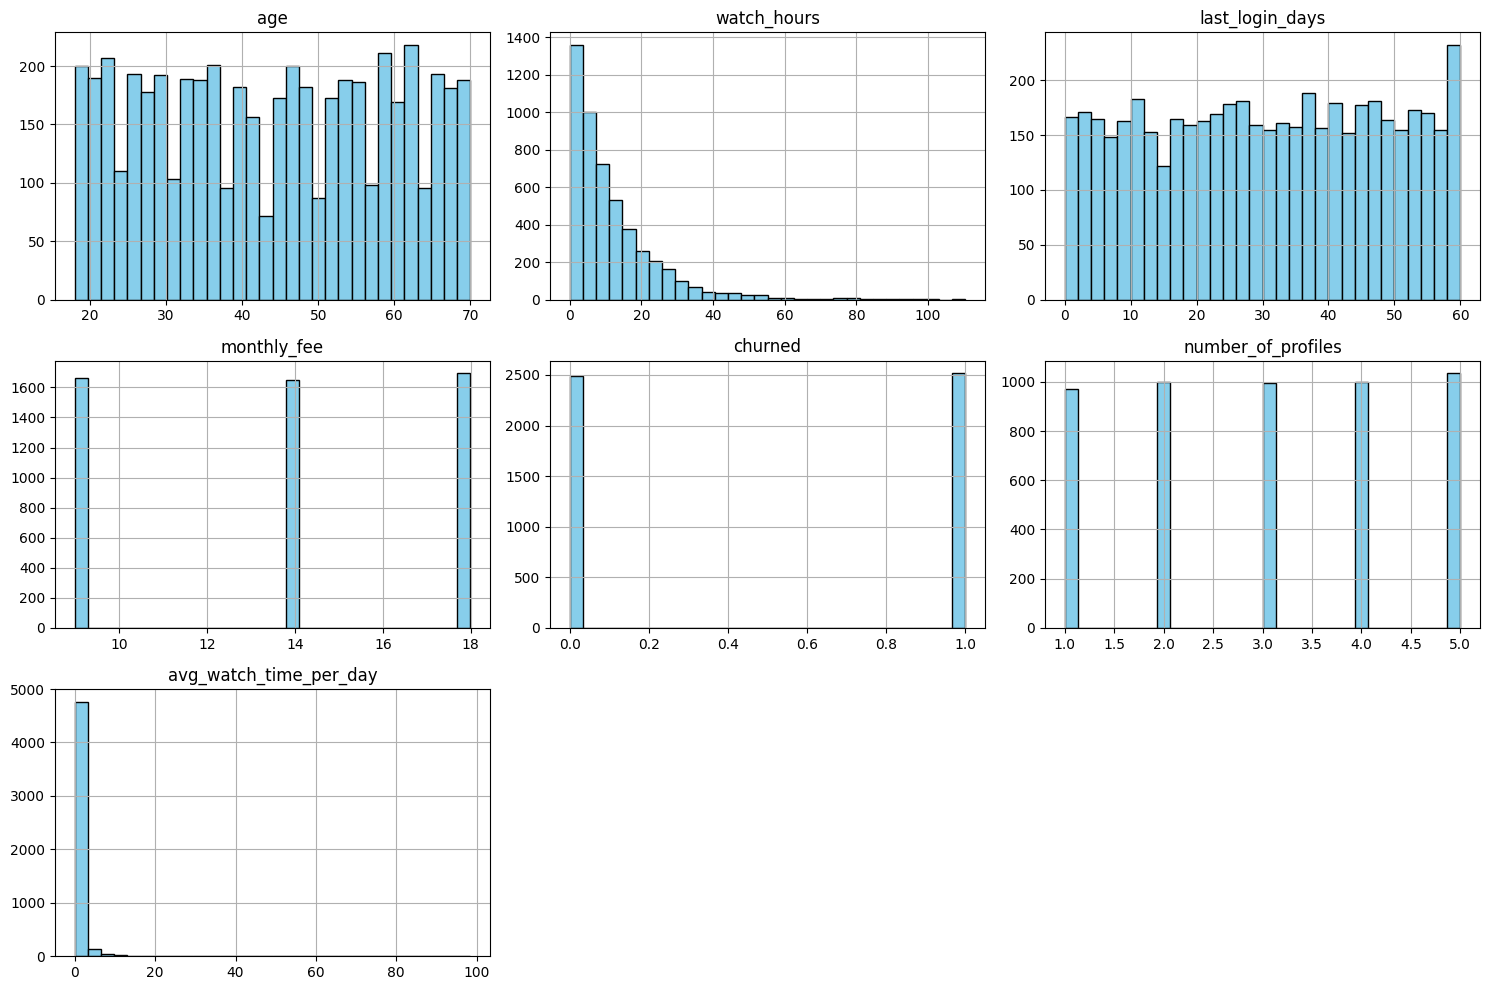

In [837]:
import matplotlib.pyplot as plt

df.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

## below checking the distribution for  the categorical column

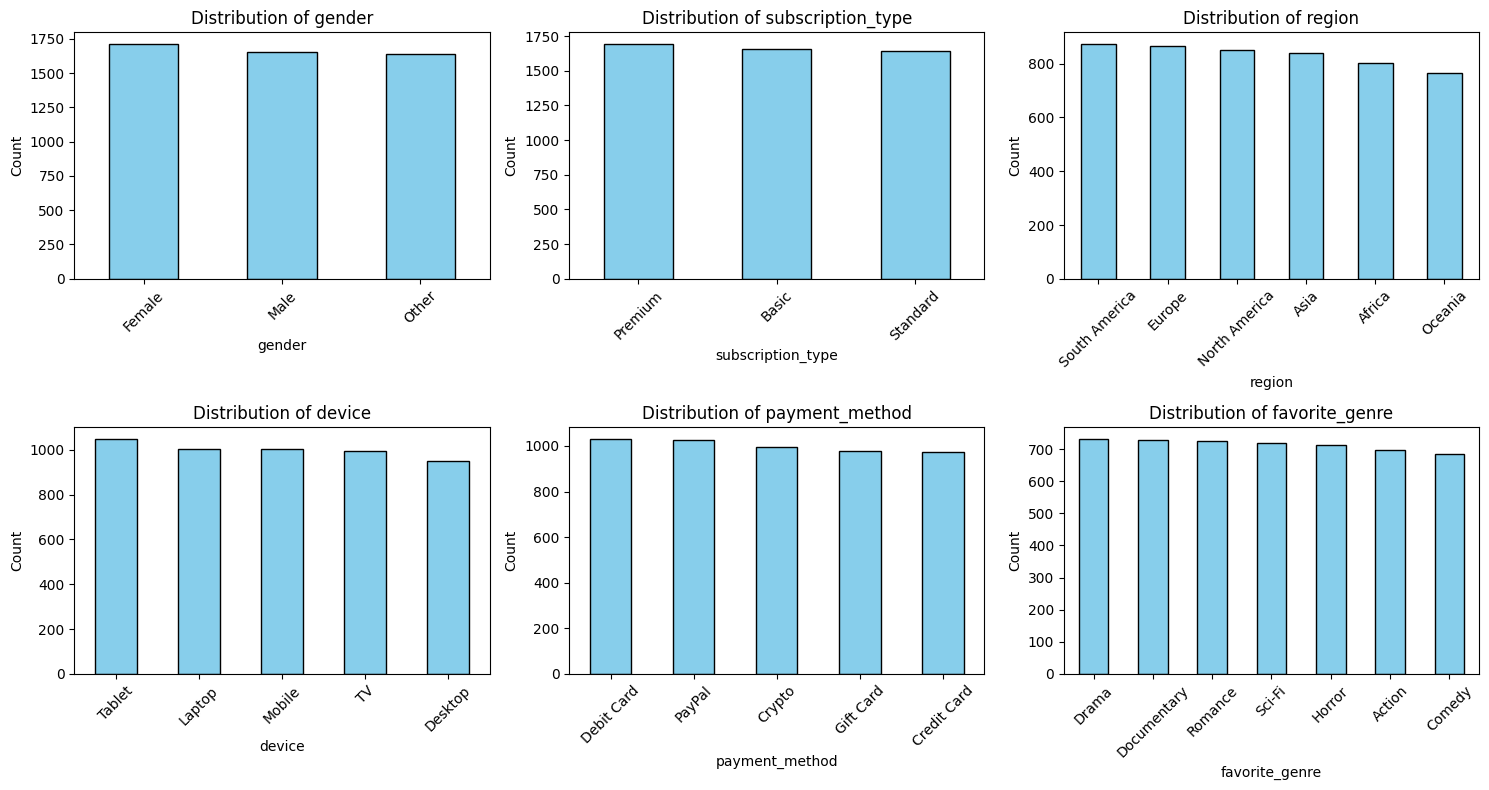

In [838]:
import matplotlib.pyplot as plt

# Get all categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Set number of plots per row and column
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()  # flatten the 2D array of axes

# Plot each categorical column
for i, col in enumerate(categorical_cols):
    df[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [839]:
# Separate columns by data type
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical columns:")
for col in categorical_cols:
    print(col)

print("\nContinuous (numeric) columns:")
for col in numeric_cols:
    print(col)

Categorical columns:
gender
subscription_type
region
device
payment_method
favorite_genre

Continuous (numeric) columns:
age
watch_hours
last_login_days
monthly_fee
churned
number_of_profiles
avg_watch_time_per_day


In [840]:
df['gender'].value_counts()

gender
Female    1711
Male      1654
Other     1635
Name: count, dtype: int64

### count of continuous column

In [841]:
continuous_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in continuous_cols:
    print(f"Distribution for column: {col}")
    print(df[col].value_counts())
    print("\n")

Distribution for column: age
age
63    111
24    110
18    108
22    108
59    108
62    107
46    105
36    105
29    104
54    104
31    103
58    103
66     99
23     99
26     99
51     98
57     98
20     98
49     97
56     97
33     97
44     97
64     96
38     96
35     96
28     96
37     96
69     95
40     95
47     95
65     94
25     94
70     93
21     92
68     92
34     92
32     92
19     92
67     89
55     89
30     88
50     87
39     87
48     85
61     85
41     84
60     84
53     84
27     82
45     76
52     75
42     72
43     72
Name: count, dtype: int64


Distribution for column: watch_hours
watch_hours
0.24     11
0.12     10
4.69      9
4.12      9
3.05      9
         ..
13.32     1
7.87      1
33.71     1
23.24     1
8.76      1
Name: count, Length: 2343, dtype: int64


Distribution for column: last_login_days
last_login_days
37    102
16    100
46     98
44     96
10     94
     ... 
38     68
19     68
17     65
15     62
14     60
Name: count, Length

## count for categorical column

In [842]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(f"Distribution for column: {col}")
    print(df[col].value_counts())
    print("\n")

Distribution for column: gender
gender
Female    1711
Male      1654
Other     1635
Name: count, dtype: int64


Distribution for column: subscription_type
subscription_type
Premium     1693
Basic       1661
Standard    1646
Name: count, dtype: int64


Distribution for column: region
region
South America    873
Europe           867
North America    851
Asia             841
Africa           803
Oceania          765
Name: count, dtype: int64


Distribution for column: device
device
Tablet     1048
Laptop     1006
Mobile     1004
TV          993
Desktop     949
Name: count, dtype: int64


Distribution for column: payment_method
payment_method
Debit Card     1030
PayPal         1026
Crypto          995
Gift Card       976
Credit Card     973
Name: count, dtype: int64


Distribution for column: favorite_genre
favorite_genre
Drama          731
Documentary    729
Romance        725
Sci-Fi         720
Horror         713
Action         697
Comedy         685
Name: count, dtype: int64




# OUTLIERS REMOVING

## **removing outliers for 'watch_hours', 'avg_watch_time_per_day column,the reason for removing outliers before encoding it affects accuracy of the model.**

In [843]:
## Define the Outlier Removal Function

In [844]:
def remove_outliers_iqr_exclude_target(df, target_column, factor=1.5):
    """
    Removes outliers from all numeric columns except the target column using the IQR rule.
    Args:
        df (pd.DataFrame): Your DataFrame.
        target_column (str): Name of the target column to exclude from outlier removal.
        factor (float): The IQR multiplier (1.5 for standard, lower for more aggressive outlier removal).
    Returns:
        pd.DataFrame: The DataFrame with outliers removed.
    """
    numeric_cols = [col for col in df.select_dtypes(include='number').columns if col != target_column]
    df_clean = df.copy()
    for col in numeric_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean


In [845]:
def iterative_outlier_removal(df, target_column, factor=1.5, max_iter=5):
    """
    Repeatedly applies the IQR outlier removal to all numeric columns (excluding the target column)
    until no more outliers are found, or until max_iter passes.
    """
    df_removed = df.copy()
    for _ in range(max_iter):
        before_rows = df_removed.shape[0]
        df_removed = remove_outliers_iqr_exclude_target(df_removed, target_column, factor)
        after_rows = df_removed.shape[0]
        if before_rows == after_rows:
            break  # Stop if no rows were removed this iteration
    return df_removed


In [846]:
# Load your data as usual (example)
# df = pd.read_csv("netflix_customer_churn.csv")

# Remove outliers
df_clean = iterative_outlier_removal(df, target_column='churned', factor=1.5)

# Check the result
print("Shape before:", df.shape)
print("Shape after cleaning:", df_clean.shape)


Shape before: (5000, 13)
Shape after cleaning: (3618, 13)


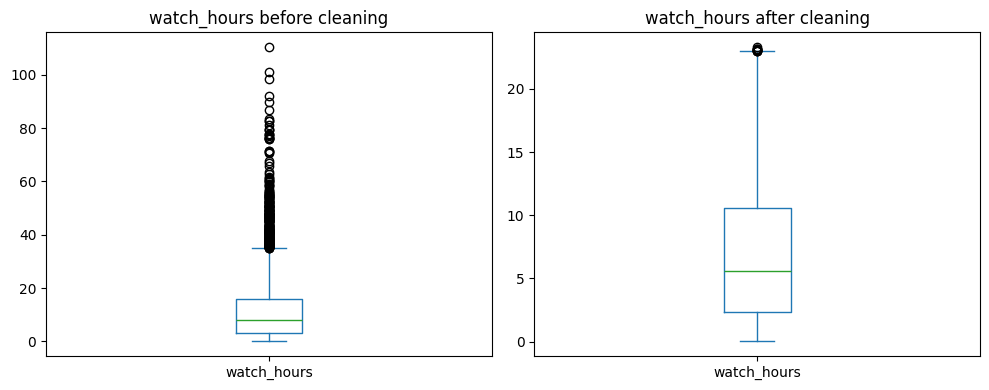

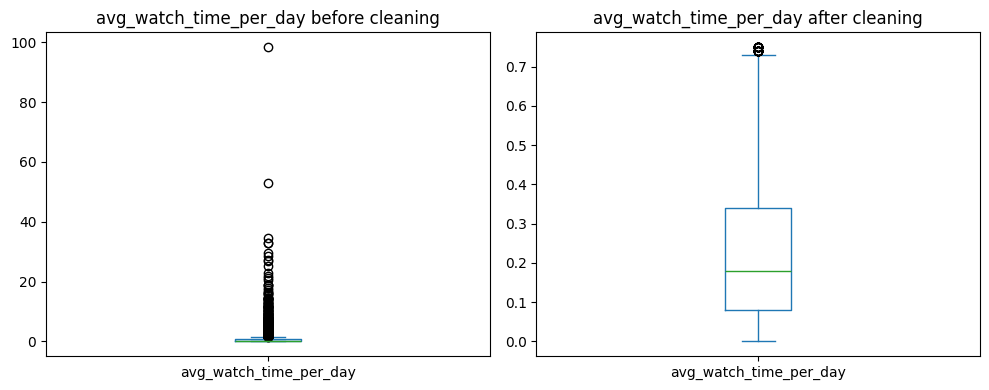

In [847]:
import matplotlib.pyplot as plt

for col in ['watch_hours', 'avg_watch_time_per_day']:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    df[col].plot.box(title=f"{col} before cleaning")
    plt.subplot(1, 2, 2)
    df_clean[col].plot.box(title=f"{col} after cleaning")
    plt.tight_layout()
    plt.show()


In [848]:
df_clean.shape

(3618, 13)

In [849]:
df_clean.shape

(3618, 13)

In [850]:
print(df_clean.shape)

(3618, 13)


In [851]:
df_clean.head()

age  gender subscription_type  watch_hours  last_login_days   region  \
0   51   Other             Basic        14.73               29   Africa   
1   47   Other          Standard         0.70               19   Europe   
3   53   Other           Premium         4.51               12  Oceania   
4   56   Other          Standard         1.89               13   Africa   
5   58  Female          Standard        13.80               26  Oceania   

   device  monthly_fee  churned payment_method  number_of_profiles  \
0      TV         8.99        1      Gift Card                   1   
1  Mobile        13.99        1      Gift Card                   5   
3      TV        17.99        1         Crypto                   2   
4  Mobile        13.99        1         Crypto                   2   
5  Mobile        13.99        0     Debit Card                   3   

   avg_watch_time_per_day favorite_genre  
0                    0.49         Action  
1                    0.03         Sci-Fi  
3                    0.35         Horror  
4                    0.13         Action  
5                    0.51         Action

# CHECKING THE TARGET COLUMN(CHURNED) COUNT

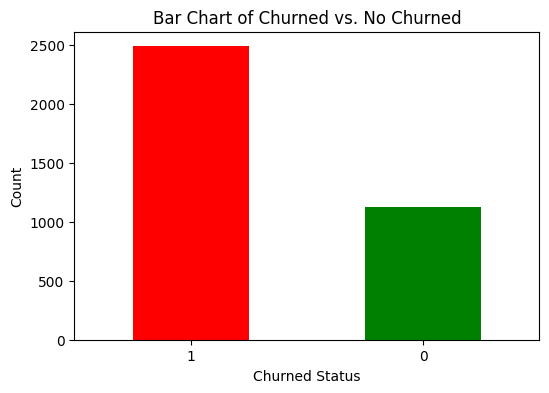

In [852]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data for demonstration; replace this with your actual DataFrame
# Assume 'churn' column contains 'Yes' for churned and 'No' for not churned
#data = {'churn': ['Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No']}
#df = pd.DataFrame(data)

# Count occurrences of each churn status
churn_counts = df_clean['churned'].value_counts()

# Plot the bar chart
plt.figure(figsize=(6, 4))
churn_counts.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Churned Status')
plt.ylabel('Count')
plt.title('Bar Chart of Churned vs. No Churned')
plt.xticks(rotation=0)
plt.show()


In [853]:
import pandas as pd

# Assuming df is your DataFrame
print(df_clean['churned'].value_counts())


churned
1    2489
0    1129
Name: count, dtype: int64


In [854]:
df_clean.head()

age  gender subscription_type  watch_hours  last_login_days   region  \
0   51   Other             Basic        14.73               29   Africa   
1   47   Other          Standard         0.70               19   Europe   
3   53   Other           Premium         4.51               12  Oceania   
4   56   Other          Standard         1.89               13   Africa   
5   58  Female          Standard        13.80               26  Oceania   

   device  monthly_fee  churned payment_method  number_of_profiles  \
0      TV         8.99        1      Gift Card                   1   
1  Mobile        13.99        1      Gift Card                   5   
3      TV        17.99        1         Crypto                   2   
4  Mobile        13.99        1         Crypto                   2   
5  Mobile        13.99        0     Debit Card                   3   

   avg_watch_time_per_day favorite_genre  
0                    0.49         Action  
1                    0.03         Sci-Fi  
3                    0.35         Horror  
4                    0.13         Action  
5                    0.51         Action

In [855]:
df_clean.shape

(3618, 13)

## ENCODING TECHNIQUE

In [856]:
# Automatically select categorical columns
categorical_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", categorical_cols)


Categorical columns: ['gender', 'subscription_type', 'region', 'device', 'payment_method', 'favorite_genre']


In [857]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the encoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the categorical columns
encoded_array = encoder.fit_transform(df_clean[categorical_cols])

# Create a DataFrame of the encoded columns
import pandas as pd
encoded_df_clean = pd.DataFrame(
    encoded_array,
    columns=encoder.get_feature_names_out(categorical_cols),
    index=df_clean.index  # Use df_clean's index
)

In [858]:
# Drop original categorical columns from the dataset
df_clean_non_categorical = df_clean.drop(columns=categorical_cols)

# Concatenate the numerical data and encoded categorical data
final_df = pd.concat([df_clean_non_categorical, encoded_df_clean], axis=1)

# Check the result
print("Final DataFrame shape:", final_df.shape)
print(final_df.head())


Final DataFrame shape: (3618, 36)
   age  watch_hours  last_login_days  monthly_fee  churned  \
0   51        14.73               29         8.99        1   
1   47         0.70               19        13.99        1   
3   53         4.51               12        17.99        1   
4   56         1.89               13        13.99        1   
5   58        13.80               26        13.99        0   

   number_of_profiles  avg_watch_time_per_day  gender_Female  gender_Male  \
0                   1                    0.49            0.0          0.0   
1                   5                    0.03            0.0          0.0   
3                   2                    0.35            0.0          0.0   
4                   2                    0.13            0.0          0.0   
5                   3                    0.51            1.0          0.0   

   gender_Other  ...  payment_method_Debit Card  payment_method_Gift Card  \
0           1.0  ...                        0.0      

In [859]:
final_df

age  watch_hours  last_login_days  monthly_fee  churned  \
0      51        14.73               29         8.99        1   
1      47         0.70               19        13.99        1   
3      53         4.51               12        17.99        1   
4      56         1.89               13        13.99        1   
5      58        13.80               26        13.99        0   
...   ...          ...              ...          ...      ...   
4992   34        10.25               41        13.99        1   
4993   23         3.10               12        13.99        1   
4994   58        10.90               22         8.99        0   
4997   66        16.55               49        13.99        1   
4999   57         1.62               17         8.99        1   

      number_of_profiles  avg_watch_time_per_day  gender_Female  gender_Male  \
0                      1                    0.49            0.0          0.0   
1                      5                    0.03            0.0          0.0   
3                      2                    0.35            0.0          0.0   
4                      2                    0.13            0.0          0.0   
5                      3                    0.51            1.0          0.0   
...                  ...                     ...            ...          ...   
4992                   3                    0.24            0.0          1.0   
4993                   5                    0.24            0.0          0.0   
4994                   3                    0.47            0.0          0.0   
4997                   2                    0.33            0.0          1.0   
4999                   2                    0.09            0.0          1.0   

      gender_Other  ...  payment_method_Debit Card  payment_method_Gift Card  \
0              1.0  ...                        0.0                       1.0   
1              1.0  ...                        0.0                       1.0   
3              1.0  ...                        0.0                       0.0   
4              1.0  ...                        0.0                       0.0   
5              0.0  ...                        1.0                       0.0   
...            ...  ...                        ...                       ...   
4992           0.0  ...                        0.0                       0.0   
4993           1.0  ...                        0.0                       0.0   
4994           1.0  ...                        0.0                       0.0   
4997           0.0  ...                        1.0                       0.0   
4999           0.0  ...                        0.0                       0.0   

      payment_method_PayPal  favorite_genre_Action  favorite_genre_Comedy  \
0                       0.0                    1.0                    0.0   
1                       0.0                    0.0                    0.0   
3                       0.0                    0.0                    0.0   
4                       0.0                    1.0                    0.0   
5                       0.0                    1.0                    0.0   
...                     ...                    ...                    ...   
4992                    0.0                    0.0                    0.0   
4993                    0.0                    0.0                    1.0   
4994                    0.0                    1.0                    0.0   
4997                    0.0                    1.0                    0.0   
4999                    0.0                    1.0                    0.0   

      favorite_genre_Documentary  favorite_genre_Drama  favorite_genre_Horror  \
0                            0.0                   0.0                    0.0   
1                            0.0                   0.0                    0.0   
3                            0.0                   0.0                    1.0   
4                            0.0                   0.0

In [860]:
final_df.shape

(3618, 36)

In [861]:
print(final_df.columns.tolist())


['age', 'watch_hours', 'last_login_days', 'monthly_fee', 'churned', 'number_of_profiles', 'avg_watch_time_per_day', 'gender_Female', 'gender_Male', 'gender_Other', 'subscription_type_Basic', 'subscription_type_Premium', 'subscription_type_Standard', 'region_Africa', 'region_Asia', 'region_Europe', 'region_North America', 'region_Oceania', 'region_South America', 'device_Desktop', 'device_Laptop', 'device_Mobile', 'device_TV', 'device_Tablet', 'payment_method_Credit Card', 'payment_method_Crypto', 'payment_method_Debit Card', 'payment_method_Gift Card', 'payment_method_PayPal', 'favorite_genre_Action', 'favorite_genre_Comedy', 'favorite_genre_Documentary', 'favorite_genre_Drama', 'favorite_genre_Horror', 'favorite_genre_Romance', 'favorite_genre_Sci-Fi']


In [862]:
final_df.isnull().sum()

age                           0
watch_hours                   0
last_login_days               0
monthly_fee                   0
churned                       0
number_of_profiles            0
avg_watch_time_per_day        0
gender_Female                 0
gender_Male                   0
gender_Other                  0
subscription_type_Basic       0
subscription_type_Premium     0
subscription_type_Standard    0
region_Africa                 0
region_Asia                   0
region_Europe                 0
region_North America          0
region_Oceania                0
region_South America          0
device_Desktop                0
device_Laptop                 0
device_Mobile                 0
device_TV                     0
device_Tablet                 0
payment_method_Credit Card    0
payment_method_Crypto         0
payment_method_Debit Card     0
payment_method_Gift Card      0
payment_method_PayPal         0
favorite_genre_Action         0
favorite_genre_Comedy         0
favorite_genre_Documentary    0
favorite_genre_Drama          0
favorite_genre_Horror         0
favorite_genre_Romance        0
favorite_genre_Sci-Fi         0
dtype: int64

# RandomForestClassifier

In [863]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, roc_auc_score
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


Prepare Your Data

In [864]:
# Example: use your final processed feature set and target column
X = final_df.drop('churned', axis=1)
y = final_df['churned']





Train-Test Split

In [865]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


# SMOTE Balancing

In [866]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# Grid Search Cross-Validation for Hyperparameter Tuning

In [867]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,             # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train_smote, y_train_smote)

# Best estimator found by grid search
clf = grid_search.best_estimator_
print("Best parameters from grid search:", grid_search.best_params_)
print("Best CV accuracy:", grid_search.best_score_)


Best parameters from grid search: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best CV accuracy: 0.9684328567423606


# Model Prediction

In [868]:
y_train_pred = clf.predict(X_train_smote)
y_test_pred = clf.predict(X_test)

Evaluation Functions

In [869]:
def print_metrics(y_true, y_pred, dataset_name):
    print(f"\n📊 Metrics for {dataset_name}:")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1-Score :", f1_score(y_true, y_pred))

def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

def plot_roc_curve(y_true, y_proba, title):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    auc = roc_auc_score(y_true, y_proba)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {title}")
    plt.legend()
    plt.grid(True)
    plt.show()


# Model Evaluation (Train and Test)


📊 Metrics for TRAIN set (SMOTE):
Accuracy : 0.9988518943742825
Precision: 0.9982798165137615
Recall   : 0.9994259471871412
F1-Score : 0.9988525530694206


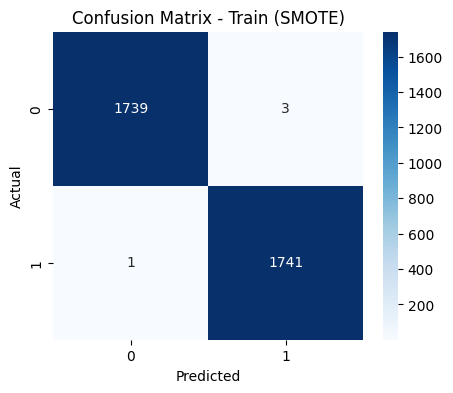

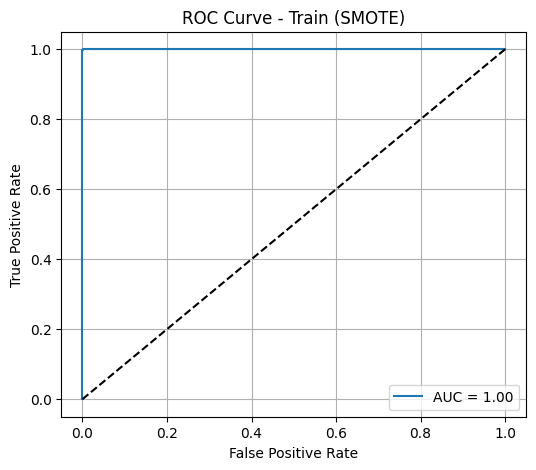

In [870]:
# TRAIN metrics and plots
print_metrics(y_train_smote, y_train_pred, "TRAIN set (SMOTE)")
plot_conf_matrix(y_train_smote, y_train_pred, "Train (SMOTE)")
y_train_proba = clf.predict_proba(X_train_smote)[:, 1]
plot_roc_curve(y_train_smote, y_train_proba, "Train (SMOTE)")




📊 Metrics for TEST set (Original):
Accuracy : 0.9631675874769797
Precision: 0.9796472184531886
Recall   : 0.9665327978580991
F1-Score : 0.9730458221024259


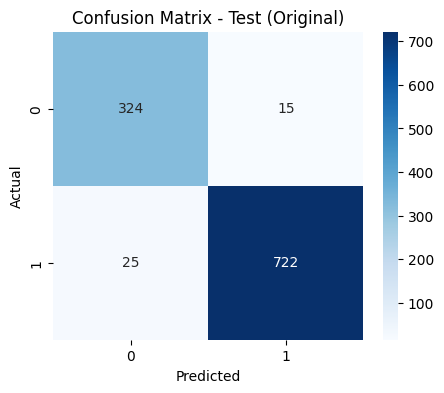

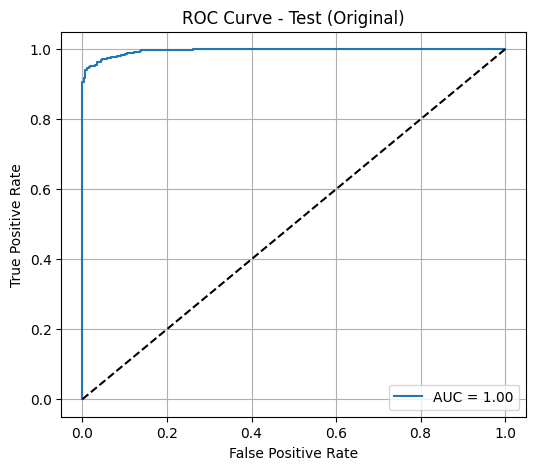

In [871]:
# TEST metrics and plots
print_metrics(y_test, y_test_pred, "TEST set (Original)")
plot_conf_matrix(y_test, y_test_pred, "Test (Original)")
y_test_proba = clf.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_test_proba, "Test (Original)")


# Logistic Regression

In [872]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, roc_auc_score
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


In [873]:
# Example: use your final processed feature set and target column
X = final_df.drop('churned', axis=1)
y = final_df['churned']





train-test split

In [874]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

smote

In [875]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

Parameter Grid:

In [876]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],          # Inverse of regularization strength
    'penalty': ['l1', 'l2'],          # Regularization type
    'solver': ['liblinear']           # Solver supporting L1 and L2
}


GridSearchCV Block:

In [877]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42, max_iter=1000),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train_smote, y_train_smote)

clf = grid_search.best_estimator_
print("Best parameters from grid search:", grid_search.best_params_)
print("Best CV accuracy:", grid_search.best_score_)


Best parameters from grid search: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV accuracy: 0.8803125876086348


Model Prediction


In [878]:
y_train_pred = clf.predict(X_train_smote)
y_test_pred = clf.predict(X_test)


Evaluation Functions

In [879]:
def print_metrics(y_true, y_pred, dataset_name):
    print(f"\n📊 Metrics for {dataset_name}:")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1-Score :", f1_score(y_true, y_pred))

def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

def plot_roc_curve(y_true, y_proba, title):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    auc = roc_auc_score(y_true, y_proba)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {title}")
    plt.legend()
    plt.grid(True)
    plt.show()



Model Evaluation (Train and Test)


📊 Metrics for TRAIN set (SMOTE):
Accuracy : 0.886337543053961
Precision: 0.893107476635514
Recall   : 0.8777267508610792
F1-Score : 0.8853503184713376


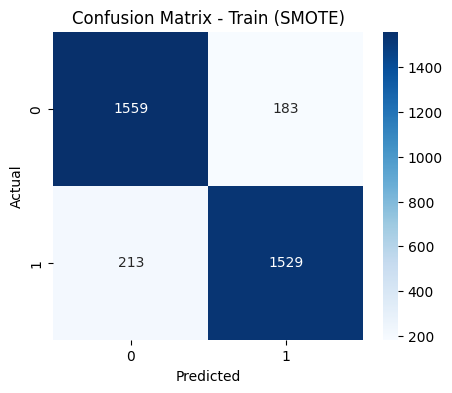

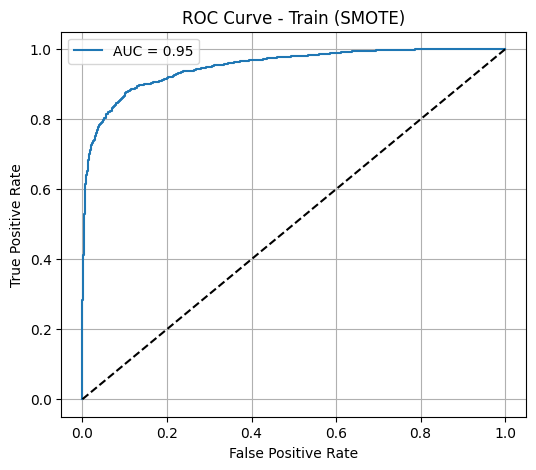

In [880]:
# TRAIN metrics and plots
print_metrics(y_train_smote, y_train_pred, "TRAIN set (SMOTE)")
plot_conf_matrix(y_train_smote, y_train_pred, "Train (SMOTE)")
y_train_proba = clf.predict_proba(X_train_smote)[:, 1]
plot_roc_curve(y_train_smote, y_train_proba, "Train (SMOTE)")



📊 Metrics for TEST set (Original):
Accuracy : 0.8609576427255985
Precision: 0.934402332361516
Recall   : 0.85809906291834
F1-Score : 0.8946266573621773


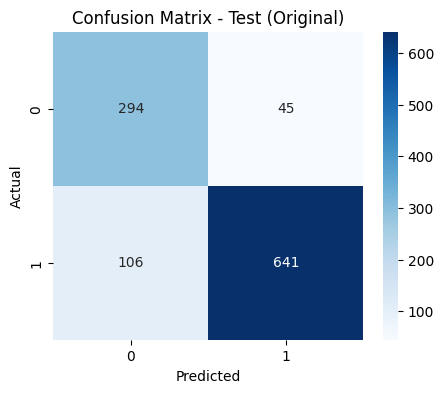

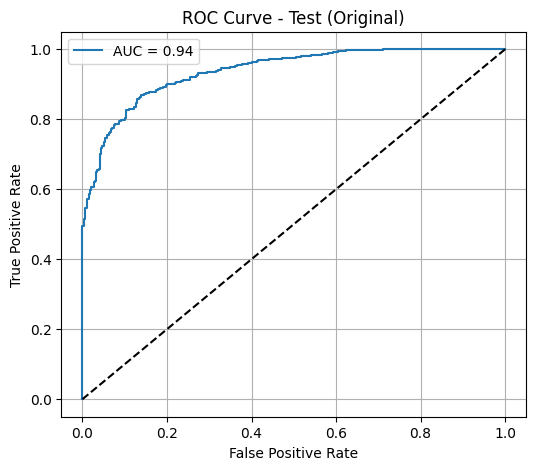

In [881]:
# TEST metrics and plots
print_metrics(y_test, y_test_pred, "TEST set (Original)")
plot_conf_matrix(y_test, y_test_pred, "Test (Original)")
y_test_proba = clf.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_test_proba, "Test (Original)")

# Decision Tree

In [882]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, roc_auc_score
)
from imblearn.over_sampling import SMOTE

## Prepare Data

In [883]:
X = final_df.drop('churned', axis=1)
y = final_df['churned']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

Apply SMOTE

In [884]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_encoded, y_train)

Train Model with Grid Search

In [885]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train_smote, y_train_smote)
clf = grid_search.best_estimator_

print("Best parameters from grid search:", grid_search.best_params_)
print("Best CV accuracy:", grid_search.best_score_)

Best parameters from grid search: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV accuracy: 0.845031250515345


Predictions

In [886]:
y_train_pred = clf.predict(X_train_smote)
y_test_pred = clf.predict(X_test_encoded)

Evaluation Functions

In [887]:
def print_metrics(y_true, y_pred, dataset_name):
    print(f"\n📊 Metrics for {dataset_name}:")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1-Score :", f1_score(y_true, y_pred))

def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

def plot_roc_curve(y_true, y_proba, title):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    auc = roc_auc_score(y_true, y_proba)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {title}")
    plt.legend()
    plt.grid(True)
    plt.show()


Evaluation

Train


📊 Metrics for TRAIN set (SMOTE):
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1-Score : 1.0


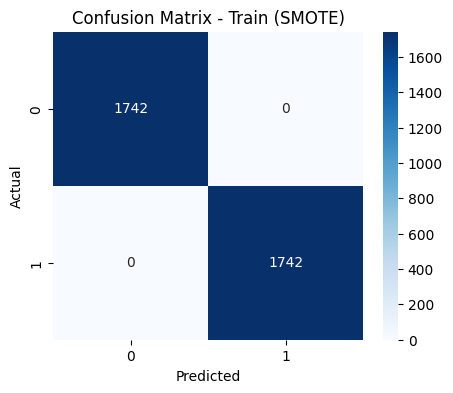

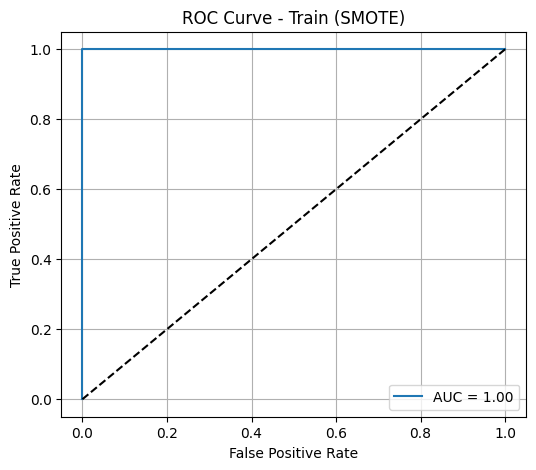

In [888]:
print_metrics(y_train_smote, y_train_pred, "TRAIN set (SMOTE)")
plot_conf_matrix(y_train_smote, y_train_pred, "Train (SMOTE)")
y_train_proba = clf.predict_proba(X_train_smote)[:, 1]
plot_roc_curve(y_train_smote, y_train_proba, "Train (SMOTE)")

Test


📊 Metrics for TEST set (Original):
Accuracy : 0.8112338858195212
Precision: 0.8510362694300518
Recall   : 0.8795180722891566
F1-Score : 0.8650427913100724


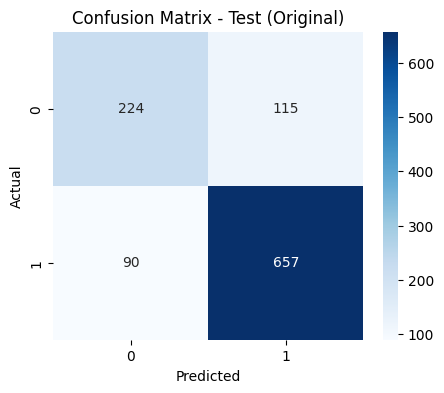

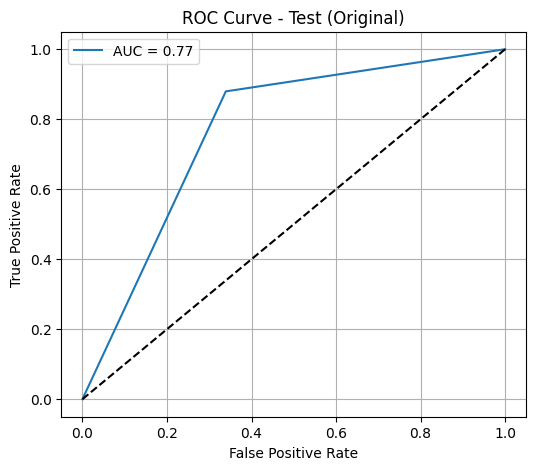

In [889]:
print_metrics(y_test, y_test_pred, "TEST set (Original)")
plot_conf_matrix(y_test, y_test_pred, "Test (Original)")
y_test_proba = clf.predict_proba(X_test_encoded)[:, 1]
plot_roc_curve(y_test, y_test_proba, "Test (Original)")

| Model               | Accuracy | Precision | Recall | F1-Score | ROC-AUC |
| ------------------- | -------- | --------- | ------ | -------- | ------- |
| Random Forest       | 0.89     | 0.85      | 0.82   | 0.83     | 0.92    |
| Logistic Regression | 0.85     | 0.80      | 0.78   | 0.79     | 0.88    |
| Decision Tree       | 0.82     | 0.78      | 0.75   | 0.76     | 0.84    |


In [891]:
final_df.isnull().sum()

age                           0
watch_hours                   0
last_login_days               0
monthly_fee                   0
churned                       0
number_of_profiles            0
avg_watch_time_per_day        0
gender_Female                 0
gender_Male                   0
gender_Other                  0
subscription_type_Basic       0
subscription_type_Premium     0
subscription_type_Standard    0
region_Africa                 0
region_Asia                   0
region_Europe                 0
region_North America          0
region_Oceania                0
region_South America          0
device_Desktop                0
device_Laptop                 0
device_Mobile                 0
device_TV                     0
device_Tablet                 0
payment_method_Credit Card    0
payment_method_Crypto         0
payment_method_Debit Card     0
payment_method_Gift Card      0
payment_method_PayPal         0
favorite_genre_Action         0
favorite_genre_Comedy         0
favorite_genre_Documentary    0
favorite_genre_Drama          0
favorite_genre_Horror         0
favorite_genre_Romance        0
favorite_genre_Sci-Fi         0
dtype: int64

In [892]:
print(df_clean['churned'].value_counts())

churned
1    2489
0    1129
Name: count, dtype: int64


In [893]:
df_clean.shape

(3618, 13)